# 0. Import Dependences

In [1]:
import ibm_watson

import pandas as pd
import tweepy
import numpy as np
#import os, sys
import matplotlib.pyplot as plt
import time, datetime
import csv
import re
import string
import json
import seaborn as sns
import datetime
from tweepy.streaming import StreamListener

# 1. Get Data from Twitter

In [2]:
#import tweepy to work with th twitter API
import tweepy as tw

#import pandas to work with dataframes
import pandas as pd

#poner claves de acceso a twitter developers
#Mis credenciales
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

#authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
#secret tokens
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth, wait_on_rate_limit = True)

### Twitter account´s info

In [3]:
cuenta = 'Berto_Romero' #Introduce the name of the user

usuario = api.get_user(cuenta)

#download profile image

import wget

profile_foto= (usuario.profile_image_url.replace('_normal',''))
    
foto = wget.download(profile_foto)

#.replace('_normal','') to obtain profile photo with a normal size.

#Twitter account´s data: date of creation, followers, nº tweets, description...

fecha_creacion = (usuario.created_at)

seguidores = (usuario.followers_count)
seguidos = (usuario.friends_count)

n_tweets = (usuario.statuses_count)

descripcion= (usuario.description)


print(fecha_creacion)
print(foto)
print(seguidores)
print(seguidos)
print(n_tweets)
print(descripcion)
foto

2008-04-04 21:53:40
czwGGE5y (1).png
2541567
351
17913
Información sobre Berto Romero. Cuenta administrada por @MPC_management @ElTerrat y El Cansancio


'czwGGE5y (1).png'

### download all tweets (without RT)

In [4]:
alltweets = []


#for screen_name in lista_names:
print(cuenta)
    #Hacer solicitud inicial de los tweets más recientes (200 es la cantidad máxima permitida)
new_tweets = api.user_timeline(screen_name = cuenta,count=200, tweet_mode= 'extended', include_rts = False)

    #Guardar los tweets más recientes
alltweets.extend(new_tweets)

    #Guardar la identificación del tweet más antiguo menos uno
oldest = alltweets[-1].id - 1
    
    #Seguir guardando tweets hasta una fecha
#while alltweets[-1].created_at > datetime.datetime(2019, 3, 31, 0, 0, 0) and len(new_tweets) > 0:
while alltweets[-1].created_at > fecha_creacion and len(new_tweets) > 0:
        #Todas las peticiones siguientes utilizan el parámetro max_id para evitar duplicados
    new_tweets = api.user_timeline(screen_name = cuenta,count=200,max_id=oldest,
                                       tweet_mode= 'extended', include_rts = False)

        #Guardar los tweets más recientes
    alltweets.extend(new_tweets)

        #Actualizar la identificación del tweet más antiguo menos uno
    oldest = alltweets[-1].id - 1

    print("...%s tweets downloaded so far." % (len(alltweets))+ ' Last date ...%s' %(alltweets[-1].created_at)) 
        


Berto_Romero
...304 tweets downloaded so far. Last date ...2020-09-09 16:23:28
...448 tweets downloaded so far. Last date ...2020-06-08 16:52:58
...620 tweets downloaded so far. Last date ...2020-03-21 19:39:22
...751 tweets downloaded so far. Last date ...2019-09-16 12:04:09
...877 tweets downloaded so far. Last date ...2019-03-01 10:07:59
...993 tweets downloaded so far. Last date ...2018-12-16 08:16:16
...1113 tweets downloaded so far. Last date ...2018-08-09 16:04:01
...1229 tweets downloaded so far. Last date ...2017-03-11 12:52:11
...1359 tweets downloaded so far. Last date ...2016-11-07 18:29:11
...1502 tweets downloaded so far. Last date ...2016-07-19 18:08:53
...1648 tweets downloaded so far. Last date ...2016-04-28 11:19:16
...1786 tweets downloaded so far. Last date ...2016-02-20 10:51:59
...1915 tweets downloaded so far. Last date ...2015-12-14 15:59:53
...2035 tweets downloaded so far. Last date ...2015-10-09 15:37:58
...2162 tweets downloaded so far. Last date ...2015-07-

### create an array of tweets without associate info

In [5]:
onlytweets=[tweet.full_text for tweet in alltweets]
len(onlytweets)

2193

### Tweets´ clean functions

In [6]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from spellchecker import SpellChecker
import re


def remove_urls (TEXT):
    TEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', TEXT, flags=re.MULTILINE)
    return(TEXT)


#drop stopwords and capital letters, then stemize

def clean_text(text):
    # Convert words to lower case and split them
    text = text.lower().split()
    # Remove stop words
    stops = set(stopwords.words("spanish"))
    text = [w for w in text if not w in stops]
    #Stem all the tweets
    stemmer = SnowballStemmer('spanish')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

def semi_limpieza(text):
    # Convert words to lower case and split them
    text = text.lower().split()
    # Remove stop words
    stops = set(stopwords.words("spanish"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
    
    
def remove_mentions(frase):
    lista = frase.split()
    nuevalista = []
    for palabra in lista:
        if '@' in palabra:
            next
        else:
            nuevalista.append(palabra)
    nuevalista = ' '.join(nuevalista)
    return(nuevalista)


### Create 1º dataframe

In [1]:
fecha= [tweet.created_at for tweet in alltweets]
RT=[tweet.retweet_count for tweet in alltweets]
fav=[tweet.favorite_count for tweet in alltweets]

data={'usuario':cuenta, 'tweet':onlytweets, 'fecha':fecha, 'retweet':RT, 'favorito':fav }
df = pd.DataFrame(data, columns = ['usuario', 'tweet', 'fecha', 'retweet', 'favorito'])
df


NameError: name 'alltweets' is not defined

In [8]:
#change the way we visualize the date
mes= [fecha.strftime("%Y-%m") for fecha in df.fecha]
df=df.drop(columns=['fecha'])
df['mes']=mes
df

,usuario,tweet,retweet,favorito,mes
0,Berto_Romero,@kukly97 @NaideSabeNada MIMIMIMIMIMI,0,3,2021-07
1,Berto_Romero,@juaky78 @LateMotivCero @IgnatiusFarray @berto...,0,1,2021-07
2,Berto_Romero,"@AntonioManresa5 @AmandaMarbles Que sí, que es...",0,8,2021-07
3,Berto_Romero,"@kikovegar Buah, ME FLIPA",0,5,2021-07
4,Berto_Romero,@CBuronB @NaideSabeNada CarDona\n😂😂😂😂,1,272,2021-07
...,...,...,...,...,...
2188,Berto_Romero,@Indiesalatrena @iconicopop es un tema que me ...,0,2,2015-06
2189,Berto_Romero,@Indiesalatrena bulo,0,2,2015-05
2190,Berto_Romero,Vamos cafeteros! https://t.co/2DbfyUX7f4,10,18,2015-05
2191,Berto_Romero,@SrMiyagiMadrid @albertochicote @cancorodrigue...,2,5,2015-05


In [9]:
#new colum of the dataframe with the tweets without mentions or URL
#this new colum will be used to obtain personality profile

df['texto_personalidad'] = df.tweet.map(lambda x: remove_urls(remove_mentions(x)))
df

,usuario,tweet,retweet,favorito,mes,texto_personalidad
0,Berto_Romero,@kukly97 @NaideSabeNada MIMIMIMIMIMI,0,3,2021-07,MIMIMIMIMIMI
1,Berto_Romero,@juaky78 @LateMotivCero @IgnatiusFarray @berto...,0,1,2021-07,"No no, la buena es la otra"
2,Berto_Romero,"@AntonioManresa5 @AmandaMarbles Que sí, que es...",0,8,2021-07,"Que sí, que está guapa esa"
3,Berto_Romero,"@kikovegar Buah, ME FLIPA",0,5,2021-07,"Buah, ME FLIPA"
4,Berto_Romero,@CBuronB @NaideSabeNada CarDona\n😂😂😂😂,1,272,2021-07,CarDona 😂😂😂😂
...,...,...,...,...,...,...
2188,Berto_Romero,@Indiesalatrena @iconicopop es un tema que me ...,0,2,2015-06,"es un tema que me tomo muy en serio, confiad e..."
2189,Berto_Romero,@Indiesalatrena bulo,0,2,2015-05,bulo
2190,Berto_Romero,Vamos cafeteros! https://t.co/2DbfyUX7f4,10,18,2015-05,Vamos cafeteros!
2191,Berto_Romero,@SrMiyagiMadrid @albertochicote @cancorodrigue...,2,5,2015-05,un honor


In [10]:
#another new colum of the dataframe with the tweets without mentions, URL, capital letters or stopwords
#this new colum will be used to obtain wordclouds

df['texto_nubes'] = df.tweet.map(lambda x: semi_limpieza(remove_urls(remove_mentions(x))))
df

,usuario,tweet,retweet,favorito,mes,texto_personalidad,texto_nubes
0,Berto_Romero,@kukly97 @NaideSabeNada MIMIMIMIMIMI,0,3,2021-07,MIMIMIMIMIMI,mimimimimimi
1,Berto_Romero,@juaky78 @LateMotivCero @IgnatiusFarray @berto...,0,1,2021-07,"No no, la buena es la otra","no, buena"
2,Berto_Romero,"@AntonioManresa5 @AmandaMarbles Que sí, que es...",0,8,2021-07,"Que sí, que está guapa esa","sí, guapa"
3,Berto_Romero,"@kikovegar Buah, ME FLIPA",0,5,2021-07,"Buah, ME FLIPA","buah, flipa"
4,Berto_Romero,@CBuronB @NaideSabeNada CarDona\n😂😂😂😂,1,272,2021-07,CarDona 😂😂😂😂,cardona 😂😂😂😂
...,...,...,...,...,...,...,...
2188,Berto_Romero,@Indiesalatrena @iconicopop es un tema que me ...,0,2,2015-06,"es un tema que me tomo muy en serio, confiad e...","tema tomo serio, confiad asunto concreto"
2189,Berto_Romero,@Indiesalatrena bulo,0,2,2015-05,bulo,bulo
2190,Berto_Romero,Vamos cafeteros! https://t.co/2DbfyUX7f4,10,18,2015-05,Vamos cafeteros!,vamos cafeteros!
2191,Berto_Romero,@SrMiyagiMadrid @albertochicote @cancorodrigue...,2,5,2015-05,un honor,honor


In [11]:
#another new colum with the cleanest tweets that will be used for the emotional analysis

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_NB_WORDS=50000
MAX_SEQUENCE_LENGTH = 50

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
#limpiamos el texto con una sola funcion lambda
df['text_limpio']=df.tweet.map(lambda x: clean_text(remove_urls(remove_mentions(x))))
#df['text_limpio0']=df.tweet.map(lambda x: clean_text(x))
#df['text_limpio']=df.text_limpio0.map(lambda x: remove_urls(x))
tokenizer.fit_on_texts(df['text_limpio'])
seq = tokenizer.texts_to_sequences(df['text_limpio'])
padded = pad_sequences(seq, maxlen=140)


In [12]:
df

,usuario,tweet,retweet,favorito,mes,texto_personalidad,texto_nubes,text_limpio
0,Berto_Romero,@kukly97 @NaideSabeNada MIMIMIMIMIMI,0,3,2021-07,MIMIMIMIMIMI,mimimimimimi,mimimimimimi
1,Berto_Romero,@juaky78 @LateMotivCero @IgnatiusFarray @berto...,0,1,2021-07,"No no, la buena es la otra","no, buena","no, buen"
2,Berto_Romero,"@AntonioManresa5 @AmandaMarbles Que sí, que es...",0,8,2021-07,"Que sí, que está guapa esa","sí, guapa","si, guap"
3,Berto_Romero,"@kikovegar Buah, ME FLIPA",0,5,2021-07,"Buah, ME FLIPA","buah, flipa","buah, flip"
4,Berto_Romero,@CBuronB @NaideSabeNada CarDona\n😂😂😂😂,1,272,2021-07,CarDona 😂😂😂😂,cardona 😂😂😂😂,cardon 😂😂😂😂
...,...,...,...,...,...,...,...,...
2188,Berto_Romero,@Indiesalatrena @iconicopop es un tema que me ...,0,2,2015-06,"es un tema que me tomo muy en serio, confiad e...","tema tomo serio, confiad asunto concreto","tem tom serio, confi asunt concret"
2189,Berto_Romero,@Indiesalatrena bulo,0,2,2015-05,bulo,bulo,bul
2190,Berto_Romero,Vamos cafeteros! https://t.co/2DbfyUX7f4,10,18,2015-05,Vamos cafeteros!,vamos cafeteros!,vam cafeteros!
2191,Berto_Romero,@SrMiyagiMadrid @albertochicote @cancorodrigue...,2,5,2015-05,un honor,honor,honor


# 2. Emotional analysis

### Import pretrained model of emotions´ recognition

In [13]:
import tensorflow as tf

model = tf.keras.models.load_model('model.h5')

In [14]:
#there are 6 categories or emotions: anger, sadness, joy, fear, surprise and disgust

import emoji 


CATEGORIES = [emoji.emojize(":red_heart:"),
              emoji.emojize(":broken_heart:"),
              emoji.emojize(":face_with_open_mouth:"), 
              emoji.emojize(":face_screaming_in_fear:"), 
              emoji.emojize(":face_with_symbols_on_mouth:"), 
              emoji.emojize(":face_vomiting:")]

CATEGORIES

['❤', '💔', '😮', '😱', '🤬', '🤮']

### Use the model with the correct colum of the dataframe and include the results in a new colum

In [97]:
pred = model.predict(padded)
emotion = [CATEGORIES[np.argmax(prediction)] for prediction in pred]
emotion_percent = [np.max(prediction) for prediction in pred]

In [98]:
pred

array([[9.4901873e-03, 6.8294203e-01, 3.8840771e-02, 2.4017680e-01,
        8.5766949e-03, 1.9973438e-02],
       [9.9130881e-01, 3.2394940e-03, 2.4067492e-03, 2.0724912e-03,
        3.3866448e-04, 6.3376478e-04],
       [7.2830357e-02, 1.2337213e-01, 4.9435312e-01, 1.4287093e-01,
        7.2283767e-02, 9.4289735e-02],
       ...,
       [5.7130896e-02, 7.8447431e-01, 1.0994872e-02, 3.4148877e-03,
        6.2842327e-03, 1.3770093e-01],
       [2.8260617e-02, 9.8596722e-02, 3.0392051e-01, 2.1046390e-01,
        9.0329602e-02, 2.6842874e-01],
       [1.7275693e-03, 4.6957200e-03, 7.3399538e-01, 2.5864395e-03,
        2.2376662e-02, 2.3461814e-01]], dtype=float32)

In [99]:
df['emotion'] = emotion
df['emotion_percent'] = emotion_percent
df

,usuario,tweet,retweet,favorito,mes,texto_personalidad,texto_nubes,text_limpio,emotion,emotion_percent
0,Berto_Romero,@EvaSoriano90 @Jedu_World @davidpareja @Buenaf...,0,10,2021-06,Me bajo. Vaya pantomima.,bajo. vaya pantomima.,bajo. vay pantomima.,💔,0.682942
1,Berto_Romero,@EvaSoriano90 @Jedu_World @davidpareja @Buenaf...,1,44,2021-06,PERO SI NO TIENE NI IDEA,si idea,si ide,❤,0.991309
2,Berto_Romero,@olalla_ruiz @davidpareja @EvaSoriano90 BOOOM,0,2,2021-06,BOOOM,booom,booom,😮,0.494353
3,Berto_Romero,@EvaSoriano90 @Jedu_World @davidpareja Día y hora,0,33,2021-06,Día y hora,día hora,dia hor,😱,0.364029
4,Berto_Romero,@Jedu_World @davidpareja @EvaSoriano90 Has hec...,0,26,2021-06,Has hecho bien en resucitar esta conversación.,hecho bien resucitar conversación.,hech bien resucit conversacion.,😮,0.920071
...,...,...,...,...,...,...,...,...,...,...
2188,Berto_Romero,Haced el favor de votar,1005,715,2015-05,Haced el favor de votar,haced favor votar,hac favor vot,😮,0.592414
2189,Berto_Romero,Una guitarra de dos mástiles que lanza llamara...,82,174,2015-05,Una guitarra de dos mástiles que lanza llamara...,guitarra dos mástiles lanza llamaradas. señor!,guitarr dos mastil lanz llamaradas. señor!,💔,0.941124
2190,Berto_Romero,"@pabloalen como es habitual, querido. Solo esc...",0,3,2015-05,"como es habitual, querido. Solo escribís miel","habitual, querido. solo escribís miel","habitual, querido. sol escrib miel",💔,0.784474
2191,Berto_Romero,@BlaiMorell todo mío!,0,3,2015-05,todo mío!,mío!,mio!,😮,0.303921


### Create a wordcloud of each emotion
#### we need a specific dataframe of each emotion

In [100]:
df_alegria = df[df.emotion == '❤']


df_tristeza = df[df.emotion == '💔']


df_sorpresa = df[df.emotion == '😮']


df_miedo = df[df.emotion == '😱']


df_enfado = df[df.emotion == '🤬']


df_asco = df[df.emotion == '🤮']
df_alegria

,usuario,tweet,retweet,favorito,mes,texto_personalidad,texto_nubes,text_limpio,emotion,emotion_percent
1,Berto_Romero,@EvaSoriano90 @Jedu_World @davidpareja @Buenaf...,1,44,2021-06,PERO SI NO TIENE NI IDEA,si idea,si ide,❤,0.991309
9,Berto_Romero,@el_descampao Existe una tercera vez en la que...,1,43,2021-06,Existe una tercera vez en la que ya empezamos ...,existe tercera vez empezamos decir hablamos de...,exist tercer vez empez dec habl demasi empez h...,❤,0.923220
30,Berto_Romero,"@ILUSTRESignoran Buah, no veáis como vengo est...",1,69,2021-05,"Buah, no veáis como vengo esta vez","buah, veáis vengo vez","buah, veais veng vez",❤,0.743915
49,Berto_Romero,"@NaideSabeNada Sí, anda, tú échales una mano c...",2,147,2021-03,"Sí, anda, tú échales una mano con el mierdi-cl...","sí, anda, échales mano mierdi-clickbait.","si, anda, echal man mierdi-clickbait.",❤,0.892804
59,Berto_Romero,@llimoo @almaguionistas @theEnricPardo ¿Sabes ...,0,3,2021-03,¿Sabes por qué ha sido premiada la tercera tem...,"¿sabes sido premiada tercera temporada, verdad?","¿sab sid premi tercer temporada, verdad?",❤,0.368001
...,...,...,...,...,...,...,...,...,...,...
2112,Berto_Romero,PARADLO TODO! Hay nuevo podcast de @TPoderosos...,39,88,2015-07,PARADLO TODO! Hay nuevo podcast de,paradlo todo! nuevo podcast,paradl todo! nuev podcast,❤,0.540788
2130,Berto_Romero,@faustianovich @danidelaorden @manuelamorenoo ...,0,4,2015-07,me bajo del proyecto si esto no se concreta,bajo proyecto si concreta,baj proyect si concret,❤,0.841526
2144,Berto_Romero,#NowPlaying Wonderful de Madness ♫ http://t.co...,8,33,2015-07,#NowPlaying Wonderful de Madness ♫,#nowplaying wonderful madness ♫,#nowplaying wonderful madness ♫,❤,0.925245
2147,Berto_Romero,"@aranzazu888 @xavier_ribera @eljueves sí, es c...",0,2,2015-07,"sí, es cierto, lástima que hayan hecho una exc...","sí, cierto, lástima hecho excepción conmigo","si, cierto, lastim hech excepcion conmig",❤,0.966363


#### Choose color and form of each wordcloud

In [101]:
from PIL import Image

forma_alegria = np.array(Image.open('Imagenes_nube\\corazon.png'))
forma_tristeza = np.array(Image.open('Imagenes_nube\\corazon-roto.jpg'))
forma_sorpresa = np.array(Image.open('Imagenes_nube\\sorpresa.png'))
forma_miedo = np.array(Image.open('Imagenes_nube\\miedo.jpg'))
forma_enfado = np.array(Image.open('Imagenes_nube\\enfado.png'))
forma_asco = np.array(Image.open('Imagenes_nube\\asco.png'))

In [102]:
from matplotlib.colors import LinearSegmentedColormap

naranja = [(0, 0, 0), (255/256, 156/256, 95/256)] #hay que normalizar los colores para conseguir el formato RGB que acepta
cm_alegria = LinearSegmentedColormap.from_list("Custom", naranja, N=20)

morado = [(0, 0, 0), (217/256, 95/256, 255/256)]
cm_tristeza = LinearSegmentedColormap.from_list("Custom", morado, N=20)

amarillo = [(0, 0, 0), (248/256, 255/256, 95/256)]
cm_sorpresa = LinearSegmentedColormap.from_list("Custom", amarillo, N=20)

gris = [(0, 0, 0), (103/256, 101/256, 101/256)]
cm_miedo = LinearSegmentedColormap.from_list("Custom", gris, N=20)

rojo = [(0, 0, 0), (252/256, 48/256, 44/256)]
cm_enfado = LinearSegmentedColormap.from_list("Custom", rojo, N=20)

verde = [(0, 0, 0), (122/256, 251/256, 152/256)]
cm_asco = LinearSegmentedColormap.from_list("Custom", verde, N=20)


#### Obtain different text for each wordcloud

In [103]:
#Textos depurados para cada nube de palabras
texto_alegria = ''.join(df_alegria.texto_nubes)
texto_tristeza = ''.join(df_tristeza.texto_nubes)
texto_sorpresa = ''.join(df_sorpresa.texto_nubes)
texto_miedo = ''.join(df_miedo.texto_nubes)
texto_enfado = ''.join(df_enfado.texto_nubes)
texto_asco = ''.join(df_asco.texto_nubes)


#### Generate 6 Wordcloud

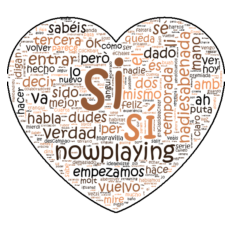

In [104]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#Nube ALEGRIA
#poner contorno wordcloud
nube_alegria=WordCloud(background_color="white", 
                       font_path = "C:\\Windows\\Fonts\\ITCKRIST.TTF",
                       max_words=4000,
                       mask=forma_alegria, 
                       colormap=cm_alegria,
                       contour_color='black',
                       contour_width=2
                      ).generate(texto_alegria)
plt.imshow(nube_alegria, interpolation="bilinear")
plt.axis('off')
plt.show()

nube_alegria.to_file('imagenes\\nube_alegria_'+cuenta+'_.png')

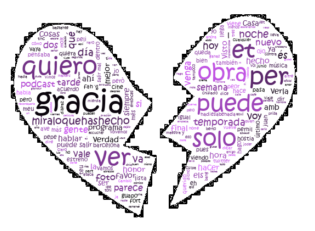

In [105]:
#Nube TRISTEZA

nube_tristeza=WordCloud(background_color="white", 
                        font_path = "C:\\Windows\\Fonts\\ITCKRIST.TTF",
                        max_words=4000,
                        mask=forma_tristeza, 
                        colormap=cm_tristeza,
                        contour_color='black',
                        contour_width=1
                      ).generate(texto_tristeza)
plt.imshow(nube_tristeza, interpolation="bilinear")
plt.axis('off')
plt.show()

nube_tristeza.to_file('imagenes\\nube_tristeza_'+cuenta+'_.png')

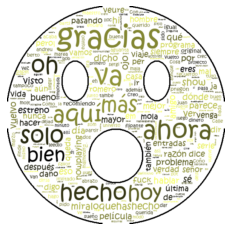

In [106]:
#Nube SOPRESA

nube_sorpresa=WordCloud(background_color="white", 
                        font_path = "C:\\Windows\\Fonts\\ITCKRIST.TTF",
                        max_words=4000,
                        mask=forma_sorpresa, 
                        colormap=cm_sorpresa,
                        contour_color='black',
                        contour_width=2
                      ).generate(texto_sorpresa)
plt.imshow(nube_sorpresa, interpolation="bilinear")
plt.axis('off')
plt.show()

nube_sorpresa.to_file('imagenes\\nube_sorpresa_'+cuenta+'_.png')

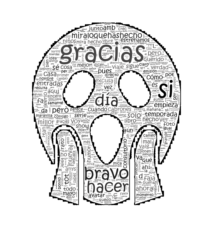

In [107]:
#Nube MIEDO

nube_miedo=WordCloud(background_color="white", 
                     font_path = "C:\\Windows\\Fonts\\ITCKRIST.TTF",
                     max_words=4000,
                     mask=forma_miedo, 
                     colormap=cm_miedo,
                     contour_color='black',
                     contour_width=2
                      ).generate(texto_miedo)
plt.imshow(nube_miedo, interpolation="bilinear")
plt.axis('off')
plt.show()

nube_miedo.to_file('imagenes\\nube_miedo_'+cuenta+'_.png')

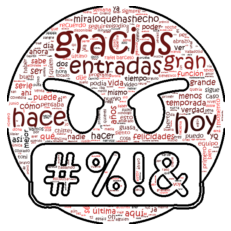

In [108]:
#Nube ENFADO

nube_enfado=WordCloud(background_color="white", 
                      font_path = "C:\\Windows\\Fonts\\ITCKRIST.TTF",
                      max_words=4000,
                      mask=forma_enfado, 
                      colormap=cm_enfado,
                      contour_color='black',
                      contour_width=5
                      ).generate(texto_enfado)
plt.imshow(nube_enfado, interpolation="bilinear")
plt.axis('off')
plt.show()

nube_enfado.to_file('imagenes\\nube_enfado_'+cuenta+'_.png')

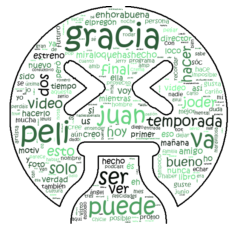

In [109]:
#Nube ASCO

nube_asco=WordCloud(background_color="white", 
                    font_path = "C:\\Windows\\Fonts\\ITCKRIST.TTF",
                    max_words=4000,
                    mask=forma_asco, 
                    colormap=cm_asco,
                    contour_color='black',
                    contour_width=2
                   ).generate(texto_asco)
plt.imshow(nube_asco, interpolation="bilinear")
plt.axis('off')
plt.show()

nube_asco.to_file('imagenes\\nube_asco_'+cuenta+'_.png')

### Emotional evolution

In [110]:
#Create a dataframe that counts de number of tweets per month
df_mes_ntweets=df.groupby(['mes']).count().tweet
df_mes_ntweets = pd.DataFrame(df_mes_ntweets)
df_mes_ntweets= df_mes_ntweets.reset_index()
df_mes_ntweets

,mes,tweet
0,2015-05,13
1,2015-06,27
2,2015-07,44
3,2015-08,41
4,2015-09,29
...,...,...
62,2021-02,30
63,2021-03,38
64,2021-04,7
65,2021-05,23


plt.figure(figsize = (15, 5))
sns.barplot( y = 'tweet', x = df_mes_ntweets.mes, data = df_mes_ntweets).set_title('nº Tweets al mes')
plt.xticks(rotation=45)
#guardo las graficas como imagenes
#plt.savefig('imagenes\\volumentweets_'+cuenta+'_.png')
plt.show()

In [111]:
#create a new colum that count the number of tweets of each emotion per month
df_mes_emo = df.groupby(['mes','emotion']).count().tweet
df_mes_emo = pd.DataFrame(df_mes_emo)
df_mes_emo= df_mes_emo.reset_index()
df_mes_emo

,mes,emotion,tweet
0,2015-05,💔,5
1,2015-05,😮,4
2,2015-05,😱,1
3,2015-05,🤬,2
4,2015-05,🤮,1
...,...,...,...
355,2021-06,💔,2
356,2021-06,😮,8
357,2021-06,😱,1
358,2021-06,🤬,1


### Obtain 6 graphics. One for each emotion. Each graphic show the evolution of that emotion

In [112]:
datos_alegria=df_mes_emo[df_mes_emo.emotion=='❤']
datos_alegria

datos_tristeza=df_mes_emo[df_mes_emo.emotion=='💔']
datos_tristeza

datos_sorpresa=df_mes_emo[df_mes_emo.emotion=='😮']
datos_sorpresa

datos_miedo=df_mes_emo[df_mes_emo.emotion=='😱']
datos_miedo

datos_enfado=df_mes_emo[df_mes_emo.emotion=='🤬']
datos_enfado

datos_asco=df_mes_emo[df_mes_emo.emotion=='🤮']
datos_alegria

,mes,emotion,tweet
5,2015-06,❤,1
11,2015-07,❤,5
17,2015-08,❤,5
23,2015-09,❤,2
29,2015-10,❤,3
35,2015-11,❤,5
41,2015-12,❤,4
47,2016-01,❤,4
53,2016-02,❤,5
59,2016-03,❤,8


#pintamos ese dataframe de alegria
plt.figure(figsize = (15, 5))
sns.barplot( y = 'tweet', x = 'mes', data = datos_alegria).set_title('Tweets alegres por mes')
plt.xticks(rotation=45)
#guardo las graficas como imagenes
#plt.savefig('imagenes\\tweets_alegres'+cuenta+'_.png')
plt.show()

#pintamos ese dataframe de tristeza
plt.figure(figsize = (15, 5))
sns.barplot( y = 'tweet', x = 'mes', data = datos_tristeza).set_title('Tweets tristes por mes')
plt.xticks(rotation=45)
#guardo las graficas como imagenes
#plt.savefig('imagenes\\tweets_tristes'+cuenta+'_.png')
plt.show()

#pintamos ese dataframe de sorpresa
plt.figure(figsize = (15, 5))
sns.barplot( y = 'tweet', x = 'mes', data = datos_sorpresa).set_title('Tweets de sorpresa por mes')
plt.xticks(rotation=45)
#guardo las graficas como imagenes
#plt.savefig('imagenes\\tweets_sorpresa'+cuenta+'_.png')
plt.show()

#pintamos ese dataframe de miedo
plt.figure(figsize = (15, 5))
sns.barplot( y = 'tweet', x = 'mes', data = datos_miedo).set_title('Tweets de miedo por mes')
plt.xticks(rotation=45)
#guardo las graficas como imagenes
#plt.savefig('imagenes\\tweets_miedo'+cuenta+'_.png')
plt.show()

#pintamos ese dataframe de enfado
plt.figure(figsize = (15, 5))
sns.barplot( y = 'tweet', x = 'mes', data = datos_enfado).set_title('Tweets enfadados por mes')
plt.xticks(rotation=45)
#guardo las graficas como imagenes
#plt.savefig('imagenes\\tweets_enfado'+cuenta+'_.png')
plt.show()

#pintamos ese dataframe de asco
plt.figure(figsize = (15, 5))
sns.barplot( y = 'tweet', x = 'mes', data = datos_asco).set_title('Tweets de asco por mes')
plt.xticks(rotation=45)
#guardo las graficas como imagenes
#plt.savefig('imagenes\\tweets_asco'+cuenta+'_.png')
plt.show()

### Obtain a joint graph

In [113]:
a=pd.merge(left= df_mes_ntweets.loc[:,['mes', 'tweet']], 
           right=datos_alegria.loc[:,['mes','tweet']], 
           how = 'outer', on = 'mes',
           suffixes=('_totales', '_alegria')
          ).fillna(0)

b=pd.merge(left= df_mes_ntweets.loc[:,['mes', 'tweet']], 
           right=datos_tristeza.loc[:,['mes','tweet']], 
           how = 'outer', on = 'mes',
           suffixes=('_totales', '_tristeza')
          ).fillna(0)

c=pd.merge(left= df_mes_ntweets.loc[:,['mes', 'tweet']], 
           right=datos_sorpresa.loc[:,['mes','tweet']], 
           how = 'outer', on = 'mes',
           suffixes=('_totales', '_sorpresa')
          ).fillna(0)

d=pd.merge(left= df_mes_ntweets.loc[:,['mes', 'tweet']], 
           right=datos_miedo.loc[:,['mes','tweet']], 
           how = 'outer', on = 'mes',
           suffixes=('_totales', '_miedo')
          ).fillna(0)

e=pd.merge(left= df_mes_ntweets.loc[:,['mes', 'tweet']], 
           right=datos_enfado.loc[:,['mes','tweet']], 
           how = 'outer', on = 'mes',
           suffixes=('_totales', '_enfado')
          ).fillna(0)

f=pd.merge(left= df_mes_ntweets.loc[:,['mes', 'tweet']], 
           right=datos_asco.loc[:,['mes','tweet']], 
           how = 'outer', on = 'mes',
           suffixes=('_totales', '_asco')
          ).fillna(0)

df_total_twemo=pd.merge(left = a, right = b, how = 'outer', on = 'mes',).fillna(0)
df_total_twemo=pd.merge(left = df_total_twemo, right  = c, how = 'outer', on = 'mes',).fillna(0)
df_total_twemo=pd.merge(left = df_total_twemo, right  = d, how = 'outer', on = 'mes',).fillna(0)
df_total_twemo=pd.merge(left = df_total_twemo, right  = e, how = 'outer', on = 'mes',).fillna(0)
df_total_twemo=pd.merge(left = df_total_twemo, right  = f, how = 'outer', on = 'mes',).fillna(0)

df_total_twemo = df_total_twemo.drop(columns=['tweet_totales_x', 'tweet_totales_y'])

df_total_twemo

,mes,tweet_alegria,tweet_tristeza,tweet_sorpresa,tweet_miedo,tweet_enfado,tweet_asco
0,2015-05,0.0,5.0,4.0,1.0,2.0,1.0
1,2015-06,1.0,8.0,5.0,6.0,5.0,2.0
2,2015-07,5.0,7.0,5.0,10.0,6.0,11.0
3,2015-08,5.0,5.0,7.0,10.0,5.0,9.0
4,2015-09,2.0,5.0,3.0,8.0,7.0,4.0
...,...,...,...,...,...,...,...
62,2021-02,2.0,11.0,6.0,3.0,5.0,3.0
63,2021-03,3.0,6.0,4.0,5.0,10.0,10.0
64,2021-04,0.0,1.0,1.0,4.0,1.0,0.0
65,2021-05,1.0,5.0,3.0,6.0,2.0,6.0


### The joint graph is a stacked bar chart plot
#### the graphic represent the whole account

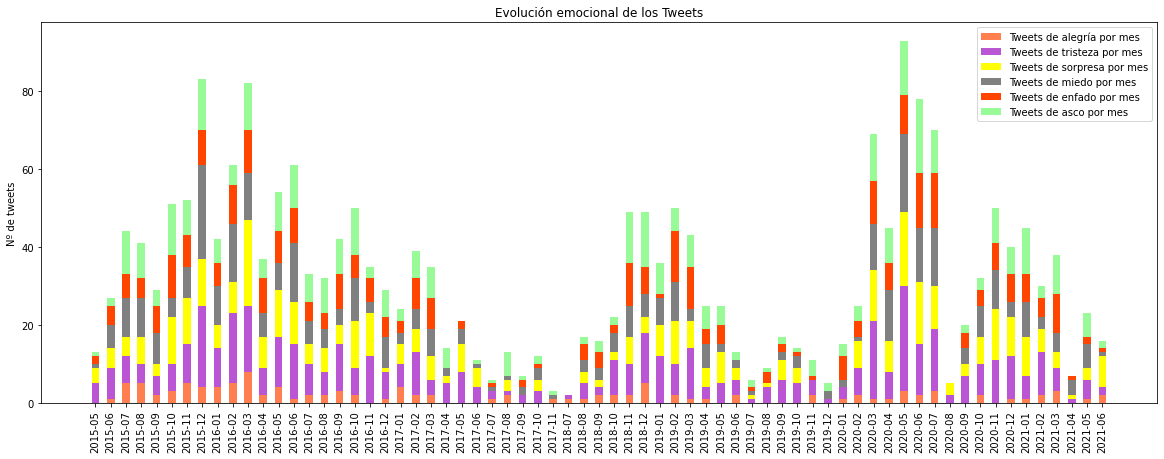

In [114]:
import matplotlib.pyplot as plt

#datos:
EjeX=df_total_twemo.mes
alegria=df_total_twemo.tweet_alegria
tristeza=df_total_twemo.tweet_tristeza
sorpresa=df_total_twemo.tweet_sorpresa
miedo=df_total_twemo.tweet_miedo
enfado=df_total_twemo.tweet_enfado
asco=df_total_twemo.tweet_asco

width = 0.5       # the width of the bars: can also be len(x) sequence 

fig, ax = plt.subplots(figsize = (20, 7))

ax.bar(EjeX, alegria, width, label='Tweets de alegría por mes', color='coral')
ax.bar(EjeX, tristeza, width, bottom=alegria, label='Tweets de tristeza por mes', color='MediumOrchid')
ax.bar(EjeX, sorpresa, width, bottom=alegria+tristeza, label='Tweets de sorpresa por mes', color='yellow')
ax.bar(EjeX, miedo, width, bottom=alegria+tristeza+sorpresa, label='Tweets de miedo por mes', color='Gray')
ax.bar(EjeX, enfado, width, bottom=alegria+tristeza+sorpresa+miedo, label='Tweets de enfado por mes', color='OrangeRed')
ax.bar(EjeX, asco, width, bottom=alegria+tristeza+sorpresa+miedo+enfado, label='Tweets de asco por mes', color='PaleGreen')



plt.xticks(rotation=90)


ax.set_ylabel('Nº de tweets')
ax.set_title('Evolución emocional de los Tweets')
ax.legend()

plt.savefig('imagenes\\evolucion_tweets_'+cuenta+'_.png')
            #, bbox_inches='tight')

plt.show()

#### Dividimos el dataframe en 2: 03/19-03/2020 y 03/2020-03/2021

In [115]:
fecha1 = ['2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
          '2020-01','2020-02']
df_antes=df_total_twemo[df_total_twemo.mes.isin(fecha1)]
df_antes

fecha2 = ['2020-03', '2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12',
          '2021-01','2021-02']
df_despues=df_total_twemo[df_total_twemo.mes.isin(fecha2)]
df_antes

,mes,tweet_alegria,tweet_tristeza,tweet_sorpresa,tweet_miedo,tweet_enfado,tweet_asco
39,2019-03,1.0,13.0,7.0,3.0,11.0,8.0
40,2019-04,1.0,3.0,5.0,6.0,4.0,6.0
41,2019-05,0.0,5.0,8.0,2.0,5.0,5.0
42,2019-06,2.0,4.0,3.0,2.0,0.0,2.0
43,2019-07,0.0,1.0,1.0,1.0,1.0,2.0
44,2019-08,0.0,4.0,1.0,0.0,3.0,1.0
45,2019-09,0.0,6.0,5.0,2.0,2.0,2.0
46,2019-10,0.0,5.0,4.0,3.0,1.0,1.0
47,2019-11,2.0,4.0,0.0,0.0,1.0,4.0
48,2019-12,0.0,1.0,0.0,2.0,0.0,2.0


#### Se genera el grafico de un año antes del confinamiento

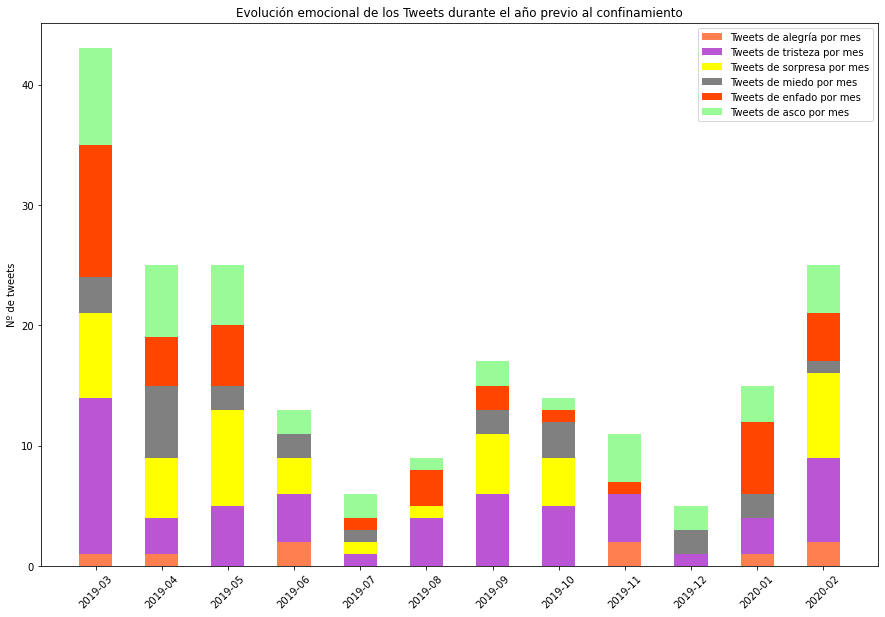

In [116]:
#datos:
EjeX=df_antes.mes
alegria=df_antes.tweet_alegria
tristeza=df_antes.tweet_tristeza
sorpresa=df_antes.tweet_sorpresa
miedo=df_antes.tweet_miedo
enfado=df_antes.tweet_enfado
asco=df_antes.tweet_asco

width = 0.5       # the width of the bars: can also be len(x) sequence 

fig, ax = plt.subplots(figsize = (15, 10))

ax.bar(EjeX, alegria, width, label='Tweets de alegría por mes', color='coral')
ax.bar(EjeX, tristeza, width, bottom=alegria, label='Tweets de tristeza por mes', color='MediumOrchid')
ax.bar(EjeX, sorpresa, width, bottom=alegria+tristeza, label='Tweets de sorpresa por mes', color='yellow')
ax.bar(EjeX, miedo, width, bottom=alegria+tristeza+sorpresa, label='Tweets de miedo por mes', color='Gray')
ax.bar(EjeX, enfado, width, bottom=alegria+tristeza+sorpresa+miedo, label='Tweets de enfado por mes', color='OrangeRed')
ax.bar(EjeX, asco, width, bottom=alegria+tristeza+sorpresa+miedo+enfado, label='Tweets de asco por mes', color='PaleGreen')


#'Coral' 'MediumOrchid' 'Yellow' 'Gray' 'OrangeRed' 'Chartreuse'
# hotpink, pink, violet, mediumorchid, rebeccapurple, slateblue

plt.xticks(rotation=45)


ax.set_ylabel('Nº de tweets')
ax.set_title('Evolución emocional de los Tweets durante el año previo al confinamiento')
ax.legend()

plt.savefig('TweetsCovid\\evolucion_tweets_antes_'+cuenta+'_.png')
            #, bbox_inches='tight')

plt.show()


#### Se genera el grafico de un año despues del inicio del confinamiento

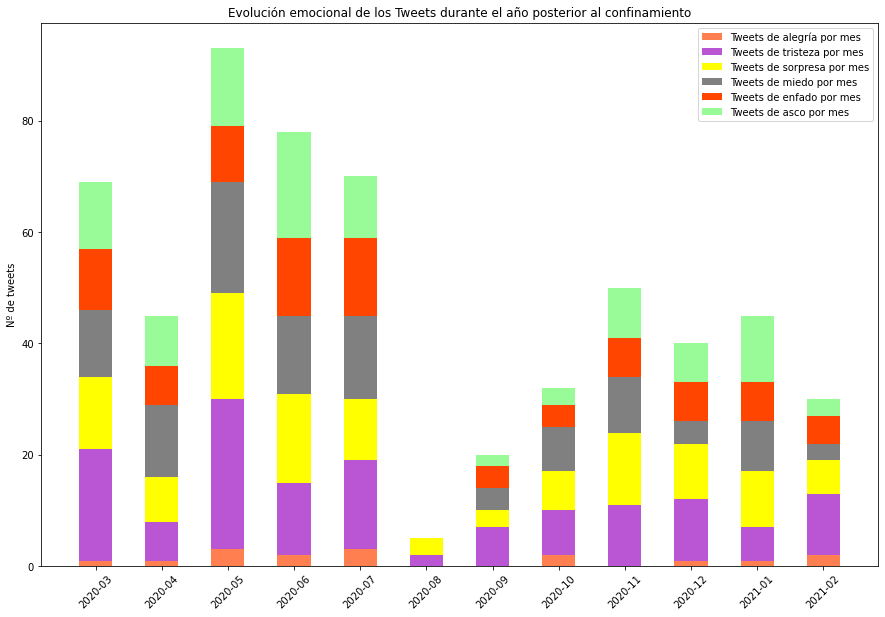

In [117]:
#datos:
EjeX=df_despues.mes
alegria=df_despues.tweet_alegria
tristeza=df_despues.tweet_tristeza
sorpresa=df_despues.tweet_sorpresa
miedo=df_despues.tweet_miedo
enfado=df_despues.tweet_enfado
asco=df_despues.tweet_asco

width = 0.5       # the width of the bars: can also be len(x) sequence 

fig, ax = plt.subplots(figsize = (15, 10))

ax.bar(EjeX, alegria, width, label='Tweets de alegría por mes', color='coral')
ax.bar(EjeX, tristeza, width, bottom=alegria, label='Tweets de tristeza por mes', color='MediumOrchid')
ax.bar(EjeX, sorpresa, width, bottom=alegria+tristeza, label='Tweets de sorpresa por mes', color='yellow')
ax.bar(EjeX, miedo, width, bottom=alegria+tristeza+sorpresa, label='Tweets de miedo por mes', color='Gray')
ax.bar(EjeX, enfado, width, bottom=alegria+tristeza+sorpresa+miedo, label='Tweets de enfado por mes', color='OrangeRed')
ax.bar(EjeX, asco, width, bottom=alegria+tristeza+sorpresa+miedo+enfado, label='Tweets de asco por mes', color='PaleGreen')


#'Coral' 'MediumOrchid' 'Yellow' 'Gray' 'OrangeRed' 'Chartreuse'
# hotpink, pink, violet, mediumorchid, rebeccapurple, slateblue

plt.xticks(rotation=45)


ax.set_ylabel('Nº de tweets')
ax.set_title('Evolución emocional de los Tweets durante el año posterior al confinamiento')
ax.legend()

plt.savefig('TweetsCovid\\evolucion_tweets_despues_'+cuenta+'_.png')
            #, bbox_inches='tight')

plt.show()


# 3. Personality Insights analysis

In [118]:
#import watson
from ibm_watson import PersonalityInsightsV3

#import authenticator from IBM
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

#My credentials for personality insights
apikey = '1J2ikpUhFW5xVOXfzugXqjNMVqh6ts-kx4Dpp8cCQwBB'
url = 'https://api.eu-gb.personality-insights.watson.cloud.ibm.com/instances/20b04252-7491-46cd-a4fa-a973d215ff04'

#Poner en marcha PI: claves, version (viene en la web de IBM) y url
authenticator = IAMAuthenticator(apikey)
personality_insights = PersonalityInsightsV3(version = '2017-10-13', authenticator = authenticator)
personality_insights.set_service_url(url)

#### Generate the text that will be used in the model

In [119]:
#Texto para la evaluación del PI
texto_PI_sindepurar=''.join(df.tweet) #sin depurar
texto_PI_depurado=''.join(df.texto_personalidad) #depurado
#obtengo textos por años para ver si cambian las respuestas
df_actual= df[df.mes>'2020-01']
df_actual

texto_pi_actual_sindepurar =''.join(df_actual.tweet) #sin depurar
texto_pi_actual_depurado =''.join(df_actual.texto_personalidad) #depurado

In [120]:
profile = personality_insights.profile(
    #texto_PI_sindepurar,
    #texto_PI_depurado,
    #texto_pi_actual_sindepurar,
    texto_pi_actual_depurado,
    content_language='es',
    accept_language='es',
    accept = 'application/json'
    ).get_result()
profile

{'word_count': 4680,
 'processed_language': 'es',
 'personality': [{'trait_id': 'big5_openness',
   'name': 'Apertura a experiencias',
   'category': 'personality',
   'percentile': 0.9144027299370939,
   'significant': True,
   'children': [{'trait_id': 'facet_adventurousness',
     'name': 'Audacia',
     'category': 'personality',
     'percentile': 0.8621546575666336,
     'significant': True},
    {'trait_id': 'facet_artistic_interests',
     'name': 'Intereses artísticos',
     'category': 'personality',
     'percentile': 0.4978059822977934,
     'significant': True},
    {'trait_id': 'facet_emotionality',
     'name': 'Emocionalidad',
     'category': 'personality',
     'percentile': 0.8558029923923132,
     'significant': True},
    {'trait_id': 'facet_imagination',
     'name': 'Imaginación',
     'category': 'personality',
     'percentile': 0.6120511859008958,
     'significant': True},
    {'trait_id': 'facet_intellect',
     'name': 'Intelecto',
     'category': 'persona

In [121]:
for personality in profile ['personality']:
    print (personality ['name'], personality ['percentile'])

Apertura a experiencias 0.9144027299370939
Responsabilidad 0.5674185175374848
Extroversión 0.09929111330034718
Amabilidad 0.8926330562120262
Rango emocional 0.7576111343573986


In [122]:
for personality in profile ['needs']:
    print (personality ['name'], personality ['percentile'])

Desafío 0.013611906517855599
Familiaridad 0.5427476821126067
Curiosidad 0.2024086544478803
Entusiasmo 0.17167369809022776
Armonía 0.6029011616925213
Ideal 0.052886563847814594
Libertad 0.6174776277066888
Amor 0.4313973558666363
Practicidad 0.49716793248743024
Autoexpresión 0.2969294451238198
Estabilidad 0.542492233643815
Estructura 0.2703012965838164


In [123]:
for personality in profile ['values']:
    print (personality ['name'], personality ['percentile'])

Conservación 0.31058609548098903
Apertura al cambio 0.36956394585761543
Hedonismo 0.4706863787910462
Superación personal 0.03849749181756085
Autotranscendencia 0.7577860736694587


## Visualise the Results

In [124]:
#import matplitlib y seaborn
from matplotlib import pyplot as plt
import seaborn as sns

### Need graphics

In [125]:
#Visualise Needs
needs = profile ['needs']
#lo convertimos en algo manejable
result = {need ['name']: need['percentile'] for need in needs}
#conseguimos los dataFrames
df_needs = pd.DataFrame.from_dict(result, orient = 'index')
df_needs.reset_index(inplace = True)
df_needs.columns = ['need', 'percentile']
#expresamos los dataframes, con .head() vemos solo los 5 primeros
df_needs.head()

,need,percentile
0,Desafío,0.013612
1,Familiaridad,0.542748
2,Curiosidad,0.202409
3,Entusiasmo,0.171674
4,Armonía,0.602901


#emplearemos seaborn para poder ver los datos en funcion de graficas o tablas...
#create plot of needs
plt.figure(figsize = (15, 5))
sns.barplot( y = 'percentile', x = 'need', data = df_needs).set_title('Necesidades')
#guardo las graficas como imagenes
plt.savefig('imagenes\\needs_'+cuenta+'_.png')
plt.show()

#Generamos la grafica circular de las necesidades

colors_needs = ['lightblue','lightsteelblue', 'silver']

plt.pie(df_needs.percentile,labels=df_needs.need, colors= colors_needs, autopct='%1.1f%%')
plt.title('Necesidades')
plt.axis('equal')
plt.savefig('imagenes\\needs_circular_'+cuenta+'_.png')
plt.show()

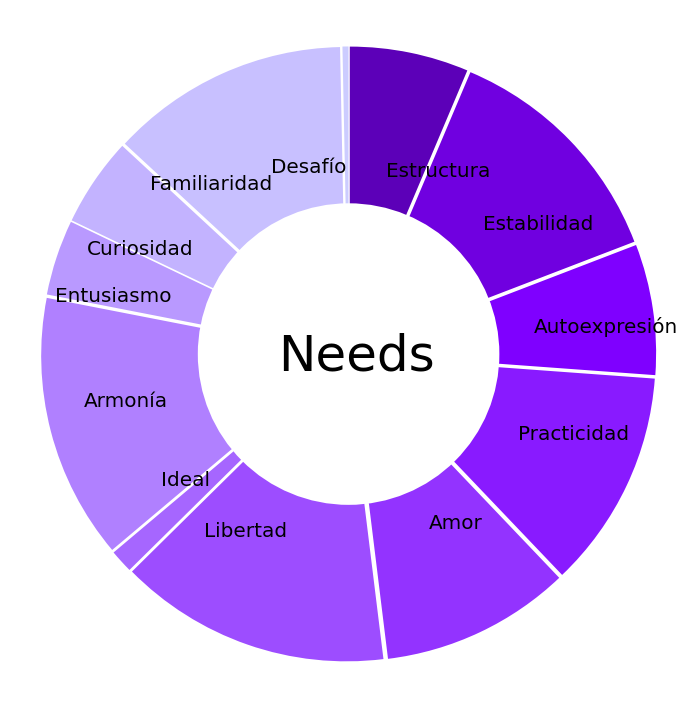

In [126]:
size_gr = 10
size_pq = size_gr*0.5
size_explode_1 = size_gr/50
size_explode_2 = size_explode_1*.8

# initialize the figure
plt.figure(figsize=(size_gr,size_gr))

alpha=.3 #alpha indica el grado de transparencia de los colores (atenuacion del color)

#podemos cambiar los colores para que se adecuen al formato final
color1 =  '#CCCCFF'
color2 =  '#C8C0FF'
color3 =  '#C3B3FF'  
color4 =   '#B999FF' 
color5 =    '#B080FF'
color6 =  '#A666FF'
color7 =  '#9D4DFF'
color8 =  '#9333FF'  
color9 =   '#891AFF' 
color10 =    '#7F00FF'
color11 =    '#7000E0'
color12 =    '#5C00B8'


labels = list(df_needs.need)

sizes = list(df_needs.percentile)

colors_big5 = [color1,
              color2,
              color3,
              color4,
              color5,
              color6,
              color7,
              color8,
              color9,
              color10,
              color11,
              color12]

#separacion entre trozos de tarta
explode_big5 = (size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1,
                  size_explode_1)


#Plot
plt.pie(sizes,
#         counterclock = False,   #es para que se rellene en sentido horario, lo quitamos para que no se nos complique la siguiente capa de la grafica
        labels=labels,
        labeldistance=0.6,
        textprops={'fontsize': size_gr*2, 'color' : 'k'},
        colors=colors_big5,
        startangle=90, 
        explode=explode_big5,
        radius=size_gr )


#Draw circle
centre_circle = plt.Circle((0,0), size_pq , fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


kwargs = dict(size=size_gr*5, va='center')
fig.text(.5,.5, 'Needs', ha='center', **kwargs)
 
plt.axis('equal')
plt.tight_layout()
plt.savefig('imagenes\\needs_anillo_'+cuenta+'_.png')
plt.show()

### Personality graphics

#### Big5

In [127]:
#vamos a intentar crear la grafica del big5 sin desglosar

personlities = profile ['personality']
#lo convertimos en algo manejable
result = {personality ['name']: personality['percentile'] for personality in personlities}
#conseguimos los dataFrames
df_personality = pd.DataFrame.from_dict(result, orient = 'index')
df_personality.reset_index(inplace = True)
df_personality.columns = ['personality', 'percentile']
#expresamos los dataframes, con .head() vemos solo los 5 primeros
df_personality.head()

,personality,percentile
0,Apertura a experiencias,0.914403
1,Responsabilidad,0.567419
2,Extroversión,0.099291
3,Amabilidad,0.892633
4,Rango emocional,0.757611


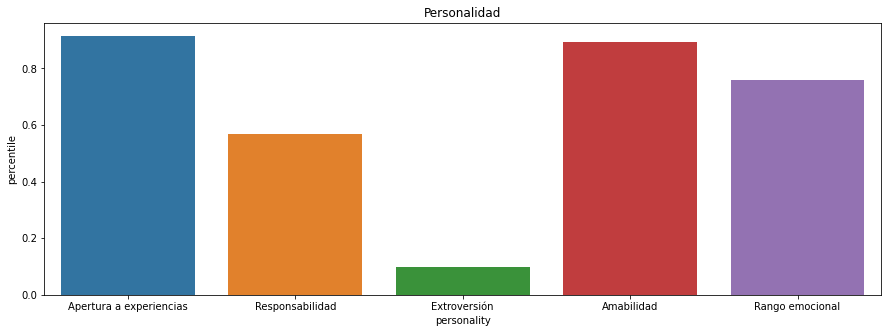

In [128]:
#emplearemos seaborn para poder ver los datos en funcion de graficas o tablas...
#create plot of needs
plt.figure(figsize = (15, 5))
sns.barplot( y = 'percentile', x = 'personality', data = df_personality).set_title('Personalidad')
#guardo las graficas como imagenes
plt.savefig('imagenes\\personality_'+cuenta+'_.png')
plt.show()

#### Graficas de cada parametro del Big5 desglosadas

In [129]:
#los resultados del Big5 son 5, pero contienen subcategorias, por eso se necesitan 5 graficas
#creamos una funcion que automatice la creacion de graficas para los diferentes resultados de personalidad del PI

#create plotting function

def create_trait_plot (name, traits):
    result = {trait ['name']: trait ['percentile'] for trait in traits}
    df = pd.DataFrame.from_dict(result, orient = 'index')
    df.reset_index(inplace = True)
    df.columns = ['personality', 'percentile']
    plt.figure(figsize = (15, 5))
    
    
    #conseguir que se guarden todas las imagenes y no solo una
    
    if name=='Apertura a experiencias':
        sns.barplot( y = 'percentile', x = 'personality', data = df, color = 'blue').set_title(name)
        plt.savefig('imagenes\\openness_'+cuenta+'_.png')
        df
        
    if name=='Responsabilidad':
        sns.barplot( y = 'percentile', x = 'personality', data = df, color = 'orange').set_title(name)
        plt.savefig('imagenes\\conscientiousness_'+cuenta+'_.png')
        df
        
    if name=='Extroversión':
        sns.barplot( y = 'percentile', x = 'personality', data = df, color = 'green').set_title(name)
        plt.savefig('imagenes\\extraversion_'+cuenta+'_.png')
        df
        
    if name=='Amabilidad':
        sns.barplot( y = 'percentile', x = 'personality', data = df, color = 'red').set_title(name)
        plt.savefig('imagenes\\agreeableness_'+cuenta+'_.png')
        df
        
    if name=='Rango emocional':
        sns.barplot( y = 'percentile', x = 'personality', data = df, color = 'purple').set_title(name)
        plt.savefig('imagenes\\emotional_'+cuenta+'_.png')
        df
 
    #plt.savefig('imagenes\\personality_(name).png')
    plt.show()
    

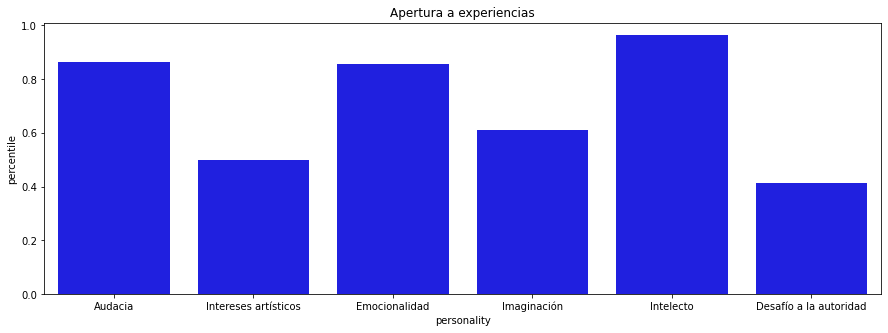

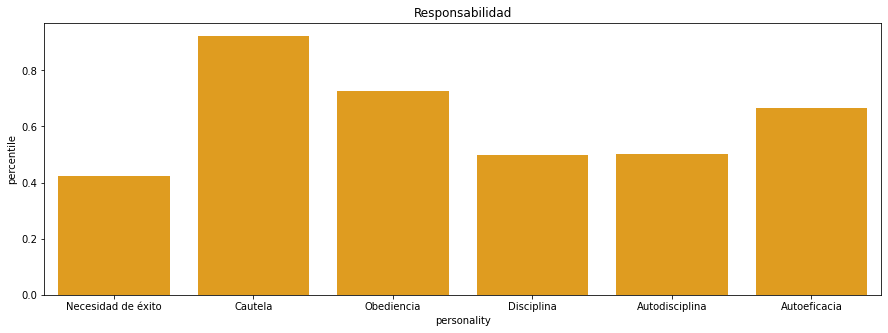

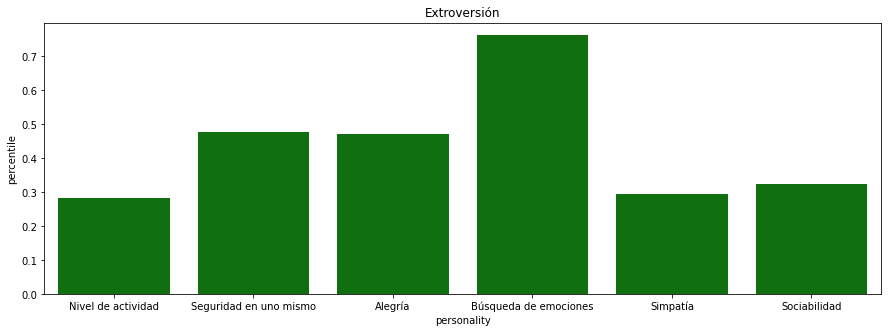

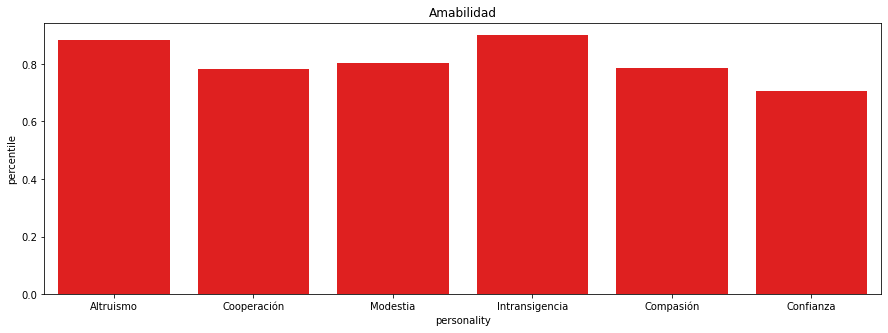

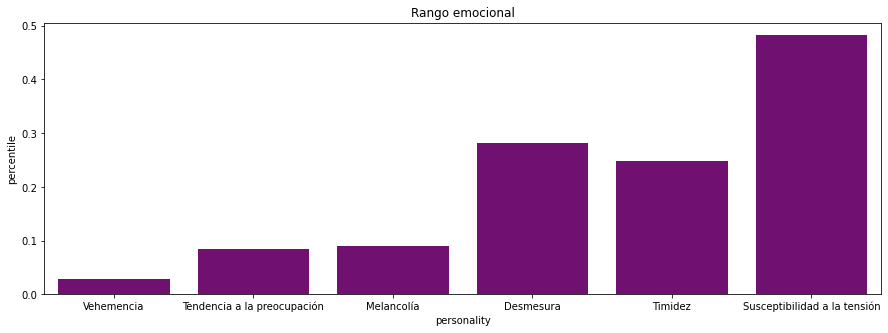

[None, None, None, None, None]

In [130]:
#visualizamos el resultado de esta funcion
[create_trait_plot (personality_trait ['name'], personality_trait['children']) for personality_trait in profile['personality']]

res1=[]
children=[]
percentile=[]

madre=['Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 
       'Conscientiousness',  'Conscientiousness',  'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness',
       'Extraversion', 'Extraversion', 'Extraversion', 'Extraversion', 'Extraversion', 'Extraversion',
       'Agreeableness', 'Agreeableness', 'Agreeableness', 'Agreeableness', 'Agreeableness', 'Agreeableness',
       'Emotional range', 'Emotional range', 'Emotional range', 'Emotional range', 'Emotional range', 'Emotional range']

for i in profile['personality']:
    p_madre =i['name']
    res1.append(p_madre)
    for j in i['children']:
        p_hija=j['name']
        children.append(p_hija)
        percentile0=j['percentile']
        percentile.append(percentile0)
        
data={'hija':children, 'percentile':percentile}
df_TP = pd.DataFrame(data, columns = ['hija', 'percentile'])
df_TP['personality']=madre
df_TP

#visualizamos todos estos datos anteriores:

plt.figure(figsize = (30, 5))

sns.barplot( y = 'percentile', x = 'hija', data = df_TP).set_title('Personalidad completa')

plt.show()

In [131]:
#Datos de la grafica

titulo1='Adventurousness, Achievement striving, Activity level, Altruism, Fiery' 
titulo2='Artistic interests, Cautiousness, Assertiveness, Cooperation, Prone to worry '
titulo3='Emotionality, Dutifulness, Cheerfulness, Modesty, Melancholy'
titulo4='Imagination, Orderliness, Excitement-seeking, Uncompromising, Immoderation'
titulo5='Intellect, Self-discipline, Outgoing, Sympathy, Self-consciousness'
titulo6='Authority-challenging, Self-efficacy, Gregariousness, Trust, Susceptible to stress'


In [132]:
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Emotional range']

hija1=[profile['personality'][0]['children'][0]['percentile'],
       profile['personality'][1]['children'][0]['percentile'],
       profile['personality'][2]['children'][0]['percentile'],
       profile['personality'][3]['children'][0]['percentile'],
       profile['personality'][4]['children'][0]['percentile']
      ]

hija2=[profile['personality'][0]['children'][1]['percentile'],
       profile['personality'][1]['children'][1]['percentile'],
       profile['personality'][2]['children'][1]['percentile'],
       profile['personality'][3]['children'][1]['percentile'],
       profile['personality'][4]['children'][1]['percentile']
      ]

hija3=[profile['personality'][0]['children'][2]['percentile'],
       profile['personality'][1]['children'][2]['percentile'],
       profile['personality'][2]['children'][2]['percentile'],
       profile['personality'][3]['children'][2]['percentile'],
       profile['personality'][4]['children'][2]['percentile']
      ]

hija4=[profile['personality'][0]['children'][3]['percentile'],
       profile['personality'][1]['children'][3]['percentile'],
       profile['personality'][2]['children'][3]['percentile'],
       profile['personality'][3]['children'][3]['percentile'],
       profile['personality'][4]['children'][3]['percentile']
      ]

hija5=[profile['personality'][0]['children'][4]['percentile'],
       profile['personality'][1]['children'][4]['percentile'],
       profile['personality'][2]['children'][4]['percentile'],
       profile['personality'][3]['children'][4]['percentile'],
       profile['personality'][4]['children'][4]['percentile']
      ]

hija6=[profile['personality'][0]['children'][5]['percentile'],
       profile['personality'][1]['children'][5]['percentile'],
       profile['personality'][2]['children'][5]['percentile'],
       profile['personality'][3]['children'][5]['percentile'],
       profile['personality'][4]['children'][5]['percentile']
      ]


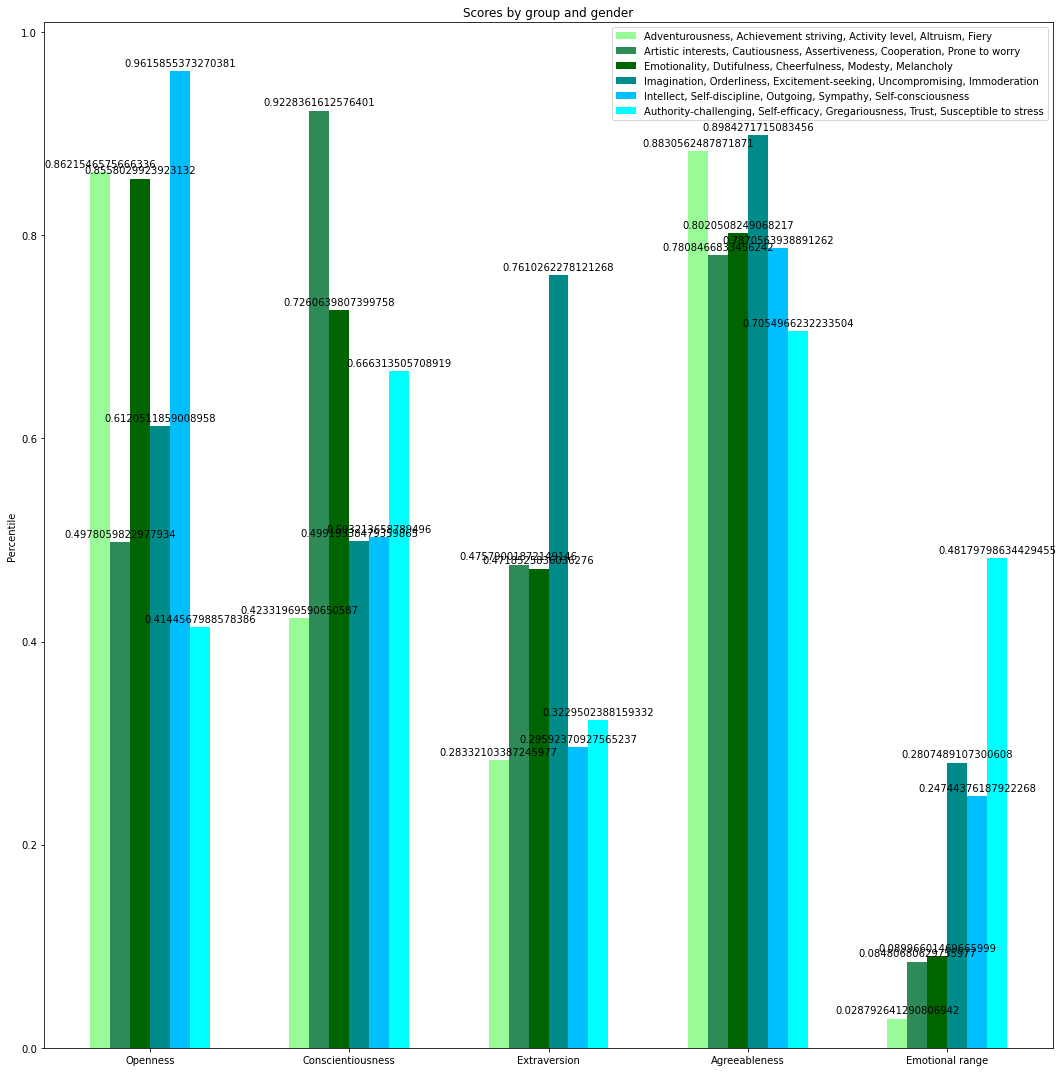

In [133]:
#grouped bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

width = 0.2 
AnchoBarra=width/2
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize = (15, 15))
rects1 = ax.bar(x - 3*(width/2) + width/4, hija1, AnchoBarra, label=titulo1, color = 'palegreen')
rects2 = ax.bar(x - 2*(width/2) + width/4, hija2, AnchoBarra, label=titulo2, color = 'seagreen')
rects3 = ax.bar(x - width/4, hija3, AnchoBarra, label=titulo3, color = 'darkgreen')
rects4 = ax.bar(x + width/4, hija4, AnchoBarra, label=titulo4, color = 'darkcyan')
rects5 = ax.bar(x + 2*(width/2) - width/4, hija5, AnchoBarra, label=titulo5, color = 'deepskyblue')
rects6 = ax.bar(x + 3*(width/2) - width/4, hija6, AnchoBarra, label=titulo6, color = 'aqua')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentile')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

### Values graphics

In [134]:
#Visualise Values

values = profile ['values']
#lo convertimos en algo manejable
result = {value ['name']: value['percentile'] for value in values}
#conseguimos los dataFrames
df_values = pd.DataFrame.from_dict(result, orient = 'index')
df_values.reset_index(inplace = True)
df_values.columns = ['value', 'percentile']
#expresamos los dataframes, con .head() vemos solo los 5 primeros
df_values.head()

,value,percentile
0,Conservación,0.310586
1,Apertura al cambio,0.369564
2,Hedonismo,0.470686
3,Superación personal,0.038497
4,Autotranscendencia,0.757786


#create plot of Values
plt.figure(figsize = (15, 5))
sns.barplot( y = 'percentile', x = 'value', data = df_values).set_title('Valores')
#guardamos imagen
plt.savefig('imagenes\\values_'+cuenta+'_.png')
plt.show()

#Generamos la gráfica circular de los valores

colors_values = ['lightcoral', 'lightsalmon', 'indianred', 'peachpuff', 'rosybrown']

plt.pie(df_values.percentile, labels=df_values.value, colors=colors_values, autopct='%1.1f%%')
plt.title('Valores')
plt.axis('equal')
plt.savefig('imagenes\\values_circular_'+cuenta+'_.png')
plt.show()

In [135]:
import plotly.express as px
import pandas as pd
fig = px.line_polar(df_values, r='percentile', theta='value', line_close=True)
fig.update_polars(angularaxis_type="category") 
fig.update_traces(fill='toself', line_color='#3DA35D')
fig.update_traces(mode="markers+lines")

fig.write_image('imagenes\\values_radar_'+cuenta+'_.png')
fig.show()

## Generate a joint graphic with Big5 classification and their subcharacteristics

In [136]:
b5_labels = []
b5_percent = []

for personality in profile ['personality']:
    b5_labels.append(personality ['name'])
    b5_percent.append(personality ['percentile'])

b5_labels,b5_percent

(['Apertura a experiencias',
  'Responsabilidad',
  'Extroversión',
  'Amabilidad',
  'Rango emocional'],
 [0.9144027299370939,
  0.5674185175374848,
  0.09929111330034718,
  0.8926330562120262,
  0.7576111343573986])

In [137]:
relative_percent = []
relative_percent_labels = []
big5Initials = ['O','C','E','A','N']
for i,p in enumerate(b5_percent):
    
    relative_percent.append(p)
    relative_percent.append(1 - p)
    
    
    relative_percent_labels.append(big5Initials[i] + ': ' + str(int(np.round(b5_percent[i],2)*100)) + '%')
    relative_percent_labels.append('')
    
    
relative_percent,relative_percent_labels

([0.9144027299370939,
  0.08559727006290607,
  0.5674185175374848,
  0.43258148246251515,
  0.09929111330034718,
  0.9007088866996529,
  0.8926330562120262,
  0.10736694378797385,
  0.7576111343573986,
  0.24238886564260143],
 ['O: 91%', '', 'C: 56%', '', 'E: 10%', '', 'A: 89%', '', 'N: 76%', ''])

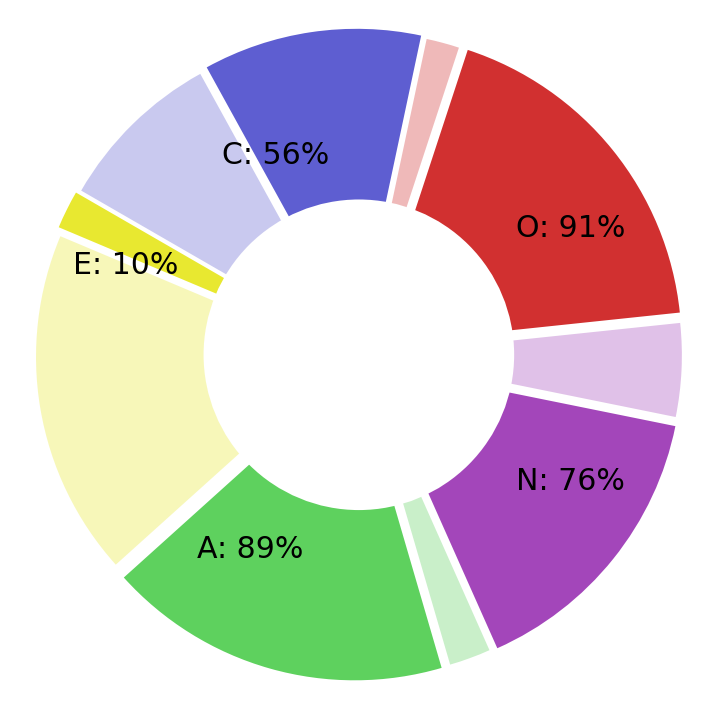

In [138]:
import matplotlib.pyplot as plt
     
size_gr = 10
size_pq = size_gr*0.5
size_explode_1 = size_gr/20
size_explode_2 = size_explode_1*.8

# initialize the figure
plt.figure(figsize=(size_gr,size_gr))

alpha=.3 #alpha indica el grado de transparencia de los colores (atenuacion del color)

#podemos cambiar los colores para que se adecuen al formato final
openness_color =  (.8,.1,.1,.9)
openness_color_alpha = (.8,.1,.1,alpha)

cons_color =  (.3,.3,.8,.9)
cons_color_alpha = (.3,.3,.8,alpha)

extra_color =  (.9,.9,.1,.9)
extra_color_alpha = (.9,.9,.1,alpha)

agree_color =  (.3,.8,.3,.9)
agree_color_alpha = (.3,.8,.3,alpha)

emot_color =  (.6,.2,.7,.9)
emot_color_alpha = (.6,.2,.7,alpha)


labels = relative_percent_labels
sizes = relative_percent

colors_big5 = [openness_color,openness_color_alpha, 
                 cons_color,cons_color_alpha,
                 extra_color,extra_color_alpha,
                 agree_color,agree_color_alpha,
                 emot_color,emot_color_alpha]

#separacion entre trozos de tarta
explode_big5 = (size_explode_1,size_explode_2,
                  size_explode_1,size_explode_2,
                  size_explode_1,size_explode_2,
                  size_explode_1,size_explode_2,
                  size_explode_1,size_explode_2)


#Plot
plt.pie(sizes,
#         counterclock = False,   #es para que se rellene en sentido horario, lo quitamos para que no se nos complique la siguiente capa de la grafica
        labels=labels,
        labeldistance=0.6,
        textprops={'fontsize': size_gr*3, 'color' : 'k'},
        colors=colors_big5,
        startangle=360/60, 
        explode=explode_big5,
        radius=size_gr )


#Draw circle
centre_circle = plt.Circle((0,0), size_pq , fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.savefig('pieBig5.png')
plt.show()

In [139]:
children = []
for personality in profile ['personality']:
    for child in personality['children']:
        children.append([personality['name'], child['name'], int(np.round(child['percentile'],2) *100)])


df = pd.DataFrame(children, columns=['parent', 'child', 'perc']) ##cambiar nombre de dataframe, ya creado mas arriba con otro nombre

In [140]:
labels_corona = []
for i,child in enumerate(df.child):
    labels_corona.append(child + ' ' + str(df.perc[i]) + '%')

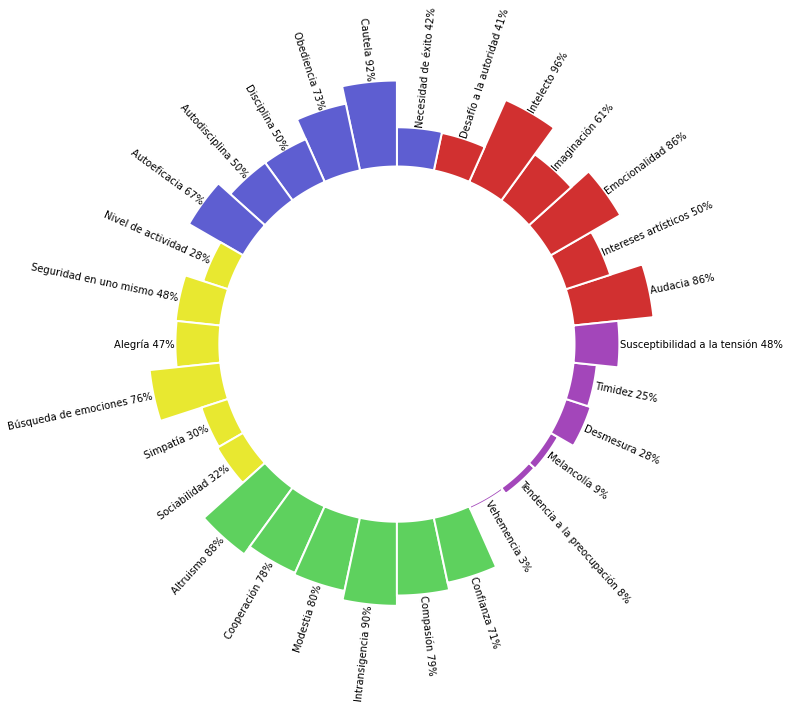

In [141]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage,AnnotationBbox


# set figure size
plt.figure(figsize=(10,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 90
lowerLimit = 190

# Compute max and min in the dataset
max = df['perc'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = df.perc

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles


colors = {'Apertura a experiencias':openness_color, 
          'Responsabilidad':cons_color, 
          'Extroversión':extra_color, 
          'Amabilidad':agree_color, 
          'Rango emocional':emot_color
         }


# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    color=df.parent.apply(lambda x: colors[x]),
    linewidth=2, 
    edgecolor="white")

# little space between the bar and the label
labelPadding = 1

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels_corona):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

plt.savefig('coronaChildrenBig5.png')


In [142]:
from PIL import Image, ImageChops, ImageDraw

def crop_to_circle(im):
    bigsize = (im.size[0] * 3, im.size[1] * 3)
    mask = Image.new('L', bigsize, 0)
    ImageDraw.Draw(mask).ellipse((0, 0) + bigsize, fill=255)
    mask = mask.resize(im.size, Image.ANTIALIAS)
    mask = ImageChops.darker(mask, im.split()[-1])
    im.putalpha(mask)

# open the image
Image1 = Image.open('pieBig5.png').convert('RGBA')
  


# make a copy the image so that 
# the original image does not get affected
Image1copy = Image1.copy()
#tengo que almacenar la imagen como una variable y emplear la variable aqui para automatizar el proceso
Image2 = Image.open(foto).convert('RGBA')
crop_to_circle(Image2)

mask_im = Image.new("L", Image2.size, 0)
draw = ImageDraw.Draw(mask_im)

w, h = 360, 360
shape = [(50, 50), (w - 20, h - 20)]
draw.ellipse(shape, fill=255)
mask_im.save('mask_circle.jpg', quality=100)

# paste image giving dimensions
Image1copy.paste(Image2, (166, 166), mask_im)
  
# save the image 
Image1copy.save('PieAndProfile.png', quality=100)

In [143]:
crop_to_circle(Image2)

In [144]:
# open the image
Image1 = Image.open('coronaChildrenBig5.png').convert('RGBA').resize((720,720))

# make a copy the image so that 
# the original image does not get affected
Image1copy = Image1.copy()
img_resize = 390
Image2 = Image.open('PieAndProfile.png').convert('RGBA').resize((img_resize,img_resize))

mask_im = Image.new("L", Image2.size, 0)
draw = ImageDraw.Draw(mask_im)

w, h = Image2.size
shape = [(10, 10), (w - 15, h - 15)]
draw.ellipse(shape, fill=255)
mask_im.save('mask_circle.jpg', quality=100)

# paste image giving dimensions
Image1copy.paste(Image2, (170, 165), mask_im)
  
# save the image 
Image1copy.save('imagenes\\plotFinal_'+cuenta+'_.png')

# 4. Generate a PDF

In [145]:
# Python libraries
from fpdf import FPDF
#from datetime import datetime, timedelta
import os
from reportlab.pdfgen import canvas #si hiciesemos el pdf con canvas en vez de con fpdf

WIDTH = 210
HEIGHT = 297

In [146]:
ntweets_str=str(n_tweets)
fecha_creacion_str=str(fecha_creacion)
seguidores_str=str(seguidores)
seguidos_str=str(seguidos)


#texto informacion del perfil
texto0='Perfil de: '+ cuenta + '.' 
texto1='Tweets de la cuenta: ' +ntweets_str+ '.'
texto2='Seguidores de la cuenta:  ' +seguidores_str+ '.'


#texto informacion big5
texto3='Los 5 grandes rasgos de personalidad (Big5) representan el modelo más utilizado para describir como interactúa una persona con el mundo. Este modelo se basa en 5 características: simpatia (agreeableness), apertura (openness), responsabilidad (conscientiousness), extraversión y neurosis o rango emocional (neuroticism or emotional range)'
textoA='Simpatía es la tendencia de una persona a ser compasiva y cooperadora con los demás'
textoC='Responsabilidad es la tendencia de una persona a actuar de forma organizada o meticulosa.'
textoE='Extraversión es la tendencia de una persona a buscar la estimulación en compañía de los demás.'
textoN='Rango emocional, también conocido como Neurosis o Reacciones naturales, es la magnitud a la que son sensibles las emociones de una persona a su entorno.'
textoO='Apertura es el punto hasta el que una persona está abierta a experimentar distintas actividades.'

#texto informacion needs
texto4='Con el parámetro "Needs" se analizan los 12 aspectos o características de un producto con los que se identifica una persona, estudiando cuales prioriza.'
#texto informacion values
texto5='Con el parámetro "Values" se analizan los 5 factores principales de motivación que influyen en la toma de decisiones de una persona. '


In [65]:
#creo funciones para cada titulo

def create_title0(pdf):
  # Unicode is not yet supported in the py3k version; use windows-1252 standard font
    pdf.set_font('Arial', '', 24)  
    pdf.ln(40)
    pdf.write(5, f"Resumen de")
    pdf.ln(10)

def create_title1(pdf):
  # Unicode is not yet supported in the py3k version; use windows-1252 standard font
    pdf.set_font('Arial', '', 24)  
    pdf.ln(40)
    pdf.write(5, f"Big5 Analytics Report")
    pdf.ln(10)
    
def create_title2(pdf):
  # Unicode is not yet supported in the py3k version; use windows-1252 standard font
    pdf.set_font('Arial', '', 24)  
    pdf.ln(40)
    pdf.write(5, f"Needs and Values Analytics Report")
    pdf.ln(10)
    
 

In [66]:
#creo la funcion para generar el pdf

def create_analytics_report(filename="Validacion\\PersonalityInsightsReport_"+cuenta+"_.pdf"):
    pdf = FPDF() # A4 (210 by 297 mm)
    
        #Portada
    pdf.add_page()
    pdf.image("imagenes\\fotosPDF\\portada5.png", 0, 0, WIDTH)
    
        # ##Información del perfil##
    pdf.set_font('Arial', '', 16)
    #fpdf.multi_cell(w: float, h: float, txt: str, border = 0, align: str = 'J', fill: bool = False)
    #teoricamente separa el texto cuando ve que se acerca al margen
    #w y h son los valores del cuadro de texto, no de la hoja
    pdf.ln(230)
    pdf.multi_cell(100, 10, texto0, border = 1)
    pdf.ln(2)
    pdf.multi_cell(100, 10, texto1, border = 1)
    pdf.ln(2)
    pdf.multi_cell(100, 10, texto2, border = 1)
    pdf.ln(2)
    #fpdf.image(name, x = None, y = None, w = 0, h = 0, type = '', link = '')
    pdf.image(''+foto+'', x=WIDTH-60, y=HEIGHT-60, w=40, h=40)
    
    
        
        
        # ##Big5##
    pdf.add_page()
    #foto titulo1
    pdf.image("imagenes\\fotosPDF\\titulo1.png", 0, 0, WIDTH)
    create_title1(pdf)
    #texto explicativo general
    #pdf.ln(230)
    pdf.set_font('Arial', '', 10)
    pdf.multi_cell(WIDTH-20, 10, texto3, border = 1)
    pdf.ln(2)    
    #foto grafica general
    pdf.image('imagenes\\personality_'+cuenta+'_.png', 5, 90, WIDTH-20)
    #graficas OPENNESS + texto explicativo
    pdf.image('imagenes\\openness_'+cuenta+'_.png', WIDTH/2-30, 160, WIDTH/2+30, HEIGHT/5 )
    pdf.set_font('Arial', '', 10)
    pdf.ln(80)
    pdf.multi_cell(WIDTH/3, 10, textoO, border = 1)  
    pdf.ln(30)
    #graficas CONSCIENTIOUSNESS + texto explicativo
    pdf.image('imagenes\\conscientiousness_'+cuenta+'_.png',WIDTH/2-30, 220, WIDTH/2+30, HEIGHT/5)
    pdf.set_font('Arial', '', 10)
    #pdf.ln(100)
    pdf.multi_cell(WIDTH/3, 10, textoC, border = 1)  
    pdf.ln(30)

    pdf.add_page()
    #foto titulo1
    pdf.image("imagenes\\fotosPDF\\titulo1.png", 0, 0, WIDTH)
    #graficas EXTRAVERSION + texto explicativo
    pdf.image('imagenes\\extraversion_'+cuenta+'_.png', WIDTH/2-30, 50,  WIDTH/2+30, HEIGHT/5 )
    pdf.set_font('Arial', '', 10)
    pdf.ln(50)
    pdf.multi_cell(WIDTH/3, 10, textoE, border = 1)  
    pdf.ln(30)
    #graficas AGREEABLENESS + texto explicativo
    pdf.image('imagenes\\agreeableness_'+cuenta+'_.png',WIDTH/2-30 , 110,  WIDTH/2+30, HEIGHT/5 )
    pdf.set_font('Arial', '', 10)
    #pdf.ln(100)
    pdf.multi_cell(WIDTH/3, 10, textoA, border = 1) 
    pdf.ln(30)
    #graficas EMOTIONAL + texto explicativo
    pdf.image('imagenes\\emotional_'+cuenta+'_.png', WIDTH/2-30, 170,  WIDTH/2+30, HEIGHT/5 )
    pdf.set_font('Arial', '', 10)
    #pdf.ln(100)
    pdf.multi_cell(WIDTH/3, 10, textoN, border = 1)  
    pdf.ln(30)
    
    
        # ##Needs##
    pdf.add_page()
    pdf.image("imagenes\\fotosPDF\\titulo2.png", 0, 0, WIDTH)
    create_title2(pdf)
    #texto explicativo general
    #pdf.ln(230)
    pdf.set_font('Arial', '', 10)
    pdf.multi_cell(WIDTH-20, 10, texto4, border = 1)
    pdf.ln(2) 
    pdf.image('imagenes\\needs_'+cuenta+'_.png', 5, 90, WIDTH-20)
    
        # ##Values##
    #texto explicativo general
    pdf.ln(90)
    pdf.set_font('Arial', '', 10)
    pdf.multi_cell(WIDTH-20, 10, texto5, border = 1)
    pdf.ln(2) 
    #pdf.image("imagenes\\fotosPDF\\titulo3.png", 0, 0, WIDTH)
    #create_title3(pdf)
    pdf.image('imagenes\\values_'+cuenta+'_.png', 5, 200, WIDTH-20)

    pdf.output(filename, 'F')
    
    
#mandamos que se ejecute la funcion de generar el pdf 
    
if __name__ == '__main__':
    
    create_analytics_report()
    

FileNotFoundError: [Errno 2] No such file or directory: 'imagenes\\needs_Buenafuente_.png'

# 5. Generate an infographic

In [2]:
# Generate the different texts that will be include in the infographic

In [147]:
#Transform the "int" into "string" to could mix in a sentence

ntweets_str
seguidores_str
seguidos_str = str(seguidos)
#fecha_str = str(fecha_creacion)
fecha_str = str(fecha_creacion.strftime("%Y-%m"))

n_alegria = str(df_alegria['tweet'].count())
n_tristeza =str(df_tristeza['tweet'].count())
n_sorpresa = str(df_sorpresa['tweet'].count())
n_miedo = str(df_miedo['tweet'].count())
n_enfado = str(df_enfado['tweet'].count())
n_asco = str(df_asco['tweet'].count())

In [148]:
Titulo_principal = 'Perfil psicológico @'+ cuenta + '.'

Texto_info = 'Nº de tweets: '+ntweets_str+'. Seguidores: '+seguidores_str+'. Seguidos: '+seguidos_str+'. Fecha de creación: '+fecha_str+'.'

TextoEvolucion = 'El usuario '+cuenta+' ha publicado '+n_alegria+' tweets alegres, '+n_tristeza+' tweets tristes, '+n_sorpresa+' tweets que expresan sorpresa, '+n_miedo+' tweets que expresan miedo, '+n_enfado+' tweets que expresan enfado y '+n_asco+' tweets que expresan asco desde '+fecha_str+', fecha en la que se creo la cuenta de Twitter.'


In [164]:
TextoOpenness = 'El rasgo de personalidad mayoritario que refleja el usuario es la apertura a la experiencia, por eso se puede definir a este usuario como curioso, tolerante, creativo, con iniciativa e interés por la innovación.'
TextoConscientiousness = 'El rasgo de personalidad mayoritario que refleja el usuario es la conciencia o responsabilidad. Se puede considerar, por tanto, que es una persona estratégica, concienzuda, minuciosa, disciplinada y organizada.'
TextoExtraversion = 'El rasgo de personalidad mayoritario que refleja el usuario es la extraversión. Se puede considerar al usuario como una persona sociable, activa, espontánea y con interés por el emprendimiento.'
TextoAgreeableness = 'El rasgo de personalidad mayoritario que refleja el usuario es la amabilidad. Se considera al usuario, por tanto, como una persona cooperativa, altruista, amigable, que confía en los demás.'
TextoNeuroticism = 'El rasgo de personalidad mayoritario que refleja es el neuroticismo. Las personas con valores altos de neuroticismo tenderán a expermientar emociones negativas, ansiedad o depresión.'

In [150]:
Texto_values_Cambio='El valor al que '+cuenta+' da mayor importancia es la apertura al cambio.'
Texto_values_Hedonismo='El valor al que '+cuenta+' da mayor importancia es el hedonismo.'
Texto_values_Superacion='El valor al que '+cuenta+' da mayor importancia es la superación personal.'
Texto_values_Autotrascendencia='El valor al que '+cuenta+' da mayor importancia es la autotrascendencia.'
Texto_values_Conservacion='El valor al que '+cuenta+' da mayor importancia es la conservación.'


In [151]:
Texto_Needs_Estructura='Y su mayor necesidad es la estructura.'
Texto_Needs_Estabilidad='Y su mayor necesidad de es la estabilidad.'
Texto_Needs_Autoexpresion='Y su mayor necesidad es la autoexpresión.'
Texto_Needs_Practicidad='Y su mayor necesidad de es la practicidad.'
Texto_Needs_Amor='Y su mayor necesidad de es el amor.'
Texto_Needs_Libertad='Y su mayor necesidad de es la libertad.'
Texto_Needs_Ideal='Y su mayor necesidad de es el ideal.'
Texto_Needs_Armonia='Y su mayor necesidad de es la armonía.'
Texto_Needs_Entusiasmo='Y su mayor necesidad de es el entusiasmo.'
Texto_Needs_Curiosidad='Y su mayor necesidad de es la curiosidad.'
Texto_Needs_Familiaridad='Y su mayor necesidad de es la familiaridad.'
Texto_Needs_Desafio='Y su mayor necesidad de es el desafío.'

In [152]:
values_labels = []
values_percent = []

for values in profile ['values']:
    values_labels.append(values ['name'])
    values_percent.append(values ['percentile'])

values_labels,values_percent


(['Conservación',
  'Apertura al cambio',
  'Hedonismo',
  'Superación personal',
  'Autotranscendencia'],
 [0.31058609548098903,
  0.36956394585761543,
  0.4706863787910462,
  0.03849749181756085,
  0.7577860736694587])

In [153]:
needs_labels = []
needs_percent = []

for needs in profile ['needs']:
    needs_labels.append(needs ['name'])
    needs_percent.append(needs ['percentile'])

needs_labels,needs_percent

(['Desafío',
  'Familiaridad',
  'Curiosidad',
  'Entusiasmo',
  'Armonía',
  'Ideal',
  'Libertad',
  'Amor',
  'Practicidad',
  'Autoexpresión',
  'Estabilidad',
  'Estructura'],
 [0.013611906517855599,
  0.5427476821126067,
  0.2024086544478803,
  0.17167369809022776,
  0.6029011616925213,
  0.052886563847814594,
  0.6174776277066888,
  0.4313973558666363,
  0.49716793248743024,
  0.2969294451238198,
  0.542492233643815,
  0.2703012965838164])

In [154]:
#Choose what text will be used according to the most representative data
Rasgo_maximo=b5_labels[b5_percent.index(np.max(b5_percent))]
Rasgo_maximo

'Apertura a experiencias'

In [155]:
#elegimos el rasgo con puntuacion maxima gracias a obtener la posicion del maximo de los porcentajes
Rasgo_maximo=b5_labels[b5_percent.index(np.max(b5_percent))]

if Rasgo_maximo == 'Apertura a experiencias':
    texto_personalidad = TextoOpenness
    
if Rasgo_maximo == 'Responsabilidad':
    texto_personalidad = TextoConscientiousness
    
if Rasgo_maximo == 'Extroversión':
    texto_personalidad = TextoExtraversion

if Rasgo_maximo == 'Amabilidad':
    texto_personalidad = TextoAgreeableness
    
if Rasgo_maximo == 'Rango emocional':
    texto_personalidad = TextoNeuroticism


In [156]:
texto_personalidad

'El rasgo de personalidad mayoritario que refleja el usuario es la apertura a la experiencia, por eso se puede definir a este usuario como curioso, tolerante, creativo, con iniciativa e interés por la innovación.'

In [157]:
Valor_maximo=values_labels[values_percent.index(np.max(values_percent))]

if Valor_maximo == 'Apertura al cambio':
    TextoValores = Texto_values_Cambio
    
if Valor_maximo == 'Hedonismo':
    TextoValores = Texto_values_Hedonismo
    
if Valor_maximo == 'Superación personal':
    TextoValores = Texto_values_Superacion

if Valor_maximo == 'Autotranscendencia':
    TextoValores = Texto_values_Autotrascendencia
    
if Valor_maximo == 'Conservación':
    TextoValores = Texto_values_Conservacion

In [158]:
TextoValores

'El valor al que Berto_Romero da mayor importancia es la autotrascendencia.'

In [159]:
Needs_maximo=needs_labels[needs_percent.index(np.max(needs_percent))]

if Needs_maximo == 'Estructura':
    TextoNeeds = Texto_Needs_Estructura
    
if Needs_maximo == 'Estabilidad':
    TextoNeeds = Texto_Needs_Estabilidad
    
if Needs_maximo == 'Autoexpresión':
    TextoNeeds = Texto_Needs_Autoexpresion

if Needs_maximo == 'Practicidad':
    TextoNeeds = Texto_Needs_Practicidad
    
if Needs_maximo == 'Amor':
    TextoNeeds = Texto_Needs_Amor
    
if Needs_maximo == 'Libertad':
    TextoNeeds = Texto_Needs_Libertad
    
if Needs_maximo == 'Ideal':
    TextoNeeds = Texto_Needs_Ideal
    
if Needs_maximo == 'Armonía':
    TextoNeeds = Texto_Needs_Armonia
    
if Needs_maximo == 'Entusiasmo':
    TextoNeeds = Texto_Needs_Entusiasmo
    
if Needs_maximo == 'Curiosidad':
    TextoNeeds = Texto_Needs_Curiosidad
    
if Needs_maximo == 'Familiaridad':
    TextoNeeds = Texto_Needs_Familiaridad
    
if Needs_maximo == 'Desafío':
    TextoNeeds = Texto_Needs_Desafio

In [160]:
TextoNeeds

'Y su mayor necesidad de es la libertad.'

In [161]:
Texto_Conclusiones=texto_personalidad + ' '+ TextoValores + ' ' + TextoNeeds
Texto_Conclusiones

'El rasgo de personalidad mayoritario que refleja el usuario es la apertura a la experiencia, por eso se puede definir a este usuario como curioso, tolerante, creativo, con iniciativa e interés por la innovación. El valor al que Berto_Romero da mayor importancia es la autotrascendencia. Y su mayor necesidad de es la libertad.'

In [3]:
#Define the sizes of the infographic and choose the location of the data

In [163]:
def infografico(filename='Infografico_'+cuenta+'_.pdf'):
    pdf = FPDF() # A4 (210 by 297 mm)
    
        #Portada
    pdf.add_page()
    pdf.image("imagenes\\fotosPDF\\fondoVerde.jpg", 0, 0, WIDTH)
    pdf.add_font('custom', '', r"C:\\Windows\\Fonts\\BRLNSR.TTF", uni=True)
    
    #con la libreria FPDF solo se puede elegir entre 5 tipos de letra: courier, helvetica/arial, times, symbol y ZapfDingbats
    
    #se define el color del texto, el tipo de letra, el tamaño, la alineacion del texto y la posición del titulo
    pdf.set_text_color(78, 110, 90)
    pdf.set_font('custom', size=30)
    pdf.set_fill_color(149, 237, 182) #no funciona esto y NO SE POR QUE
    #pdf.multi_cell(ANCHO CUADRO DE TEXTO, ALTO CUADRO DE TEXTO PAR CADA LINEA, Titulo_principal, si se recuadra o no, tipo de alineacion del texto)
    pdf.multi_cell(190, 10, Titulo_principal, border = 0, align = 'C')
    
    #descripcion de la cuenta que se analiza, no hace falta repetir lo del color
    pdf.ln(2)#para separar las celdas
    pdf.set_font('custom', size=20)
    pdf.multi_cell(190, 10, Texto_info, border = 0, align = 'C')
    
    #incluimos el grafico conjunto del big5
    pdf.image('imagenes\\plotFinal_'+cuenta+'_.png',10 , 45, WIDTH/2) #el ultimo parametro indica cuanto mide de ancho la imagen
    
    #pongo el subtitulo1
    #pdf.ln(2)
    #pdf.set_font('Arial', '',10)
    #pdf.multi_cell(WIDTH/2-15, 10, Subtitulo1, border = 0, align = 'C')
    
    #incluyo el texto del big5, se elige solo en funcion del parametro maximo
    pdf.ln(115)
    pdf.set_text_color(0, 0, 0)
    pdf.set_font('Arial', '', 10)
    pdf.multi_cell(190, 6, Texto_Conclusiones, border = 1, align = 'J')
        
    #incluyo las graficas de los valores y las necesidades
    pdf.image('imagenes\\values_radar_'+cuenta+'_.png',WIDTH/2+20, 50, WIDTH/3)
    pdf.image('imagenes\\needs_anillo_'+cuenta+'_.png',WIDTH/2+30, 100, WIDTH/4)
        
    #incluimos la grafica de la evolucion de los tweets
    pdf.image('imagenes\\evolucion_tweets_'+cuenta+'_.png', x = 5 , y = 180 ,w = WIDTH-10 )
   
    #se ponen las 6 nubes de palabras
    pdf.image('imagenes\\nube_alegria_'+cuenta+'_.png',10, 255, WIDTH/7)
    pdf.image('imagenes\\nube_tristeza_'+cuenta+'_.png',10+WIDTH/7+2, 260, WIDTH/7)
    pdf.image('imagenes\\nube_sorpresa_'+cuenta+'_.png',10+2*(WIDTH/7+2), 255, WIDTH/7)
    pdf.image('imagenes\\nube_miedo_'+cuenta+'_.png',10+3*(WIDTH/7+2), 250, WIDTH/7)
    pdf.image('imagenes\\nube_enfado_'+cuenta+'_.png',10+4*(WIDTH/7+2), 255, WIDTH/7)
    pdf.image('imagenes\\nube_asco_'+cuenta+'_.png',10+5*(WIDTH/7+2), 255, WIDTH/7)
    
    
    #para que genere el pdf, ya que da la orden de dejar de modificar cosas
    pdf.output(filename, 'F')
    
if __name__ == '__main__':
    
    infografico()
   

# 6. Enviar el pdf por correo

In [ ]:
#You need to give permission in myaccount.google.com for insecure apps to have access to gmail

import smtplib
from email.message import EmailMessage

#You need to download a MIME (Multipurpose Internet Mail Extensions). 
#This is necesary for smtplib to accept other characters appart from ASCII (such as images or pdf)

from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders


#sender_email
#contraseña
sender_email=''
rec_email=''
contraseña=input(str('Introduce your password:'))
#subject:'Resultado del análisis de personalidad de'+cuenta+'.'
body='Te adjunto en este correo el informe del analisis de la cuenta de '+cuenta+'.'
#mensaje=f'Subject:{subject}\n\n\n{body}'



#Setup the MIME
message = MIMEMultipart()
message['From'] = sender_email
message['To'] = rec_email
message['Subject'] = 'Resultado del análisis de personalidad de '+cuenta+'.'

message.attach(MIMEText(body, 'plain'))

pdfname = 'PersonalityInsightsReport.pdf'
 
# open the file in bynary
binary_pdf = open(pdfname, 'rb')
 
payload = MIMEBase('application', 'octate-stream', Name=pdfname)
payload.set_payload((binary_pdf).read())
 
# enconding the binary into base64
encoders.encode_base64(payload)
 
# add header with pdf name
payload.add_header('Content-Decomposition', 'attachment', filename=pdfname)
message.attach(payload)



#use gmail with port
session = smtplib.SMTP('smtp.gmail.com', 587)

#enable security
session.starttls()

#login with mail_id and password
session.login(sender_email, contraseña)

text = message.as_string()
session.sendmail(sender_email, rec_email, text)
session.quit()
print('Mail Sent')
